# Importing Dependencies 

In [38]:
import pandas as pd
import numpy as np
import glob
import soundfile
import os
import sys
from pydub import AudioSegment
from pydub.playback import play

import matplotlib.pyplot as plt

import warnings

import librosa
import librosa.display
import seaborn as sn


from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from IPython.display import Audio

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 




# Loading the dataset

In [2]:
#loading the dataset from the "dataset folder and mapping them to obtain a pandas dataframe"
dataset_path = "C:/Users/hp/Downloads/Speech-Emotion-Recognization-master/Speech-Emotion-Recognization-master/dataset/"
dataDirectorylist = os.listdir(dataset_path)
Emotion=[]
path=[]
for dir in dataDirectorylist:
    actor = os.listdir(dataset_path+dir)
    for file in actor :
        part = file.split('.')[0]
        part = part.split('-')
        Emotion.append(int(part[2]))
        path.append(dataset_path+dir+'//'+file)
emotion_df = pd.DataFrame(Emotion,columns=['Emotions'])
emotion_df = emotion_df.Emotions.replace({1:'neutral',2: 'calm',3: 'happy',4: 'sad',5: 'angry',6: 'fearful',7: 'disgust',8: 'surprised'})

path_df = pd.DataFrame(path,columns=['Paths'])
dataset_dataframe = pd.concat([emotion_df,path_df],axis=1)

dataset_dataframe.head()


,Emotions,Paths
0,neutral,C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1,neutral,C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
2,neutral,C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
3,neutral,C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
4,calm,C:/Users/hp/Downloads/Speech-Emotion-Recogniza...


In [3]:
#converting the data into a CSV file
dataset_dataframe = pd.concat([dataset_dataframe],axis=0)
dataset_dataframe.to_csv("data_path.csv",index=False)
dataset_dataframe.head
dataPath=pd.read_csv("data_path.csv")
print(dataPath)

       Emotions                                              Paths
0       neutral  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1       neutral  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
2       neutral  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
3       neutral  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
4          calm  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
...         ...                                                ...
1435  surprised  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1436  surprised  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1437  surprised  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1438  surprised  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1439  surprised  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...

[1440 rows x 2 columns]


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


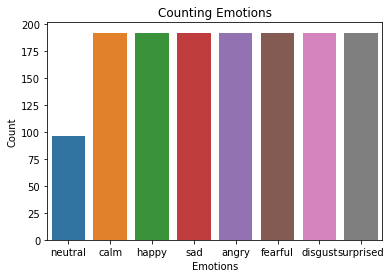

In [4]:
#Data Analysis on the data with the file and graphs
plt.title("Counting Emotions")
sn.countplot(dataPath.Emotions)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()

In [5]:
def waveplot(data,sr,e) :
    plt.figure(figsize=(10,3))
    librosa.display.waveshow(data,sr=sr,label=e)
    plt.title(e)
    plt.show()
    Audio(path)
    song = AudioSegment.from_wav(path)
    print('playing the emotion :',e)
    play(song)

# Data Visualization

EMOTION :  neutral
Chroma Visualization for the emotion:  neutral
Spectogram for the emotion  neutral
Zero Crossing rate for the emotion  neutral
Zero crossing rate: 16391


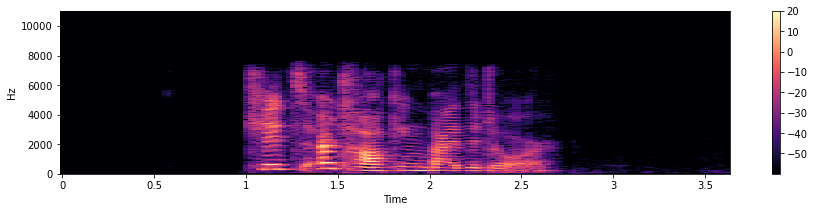

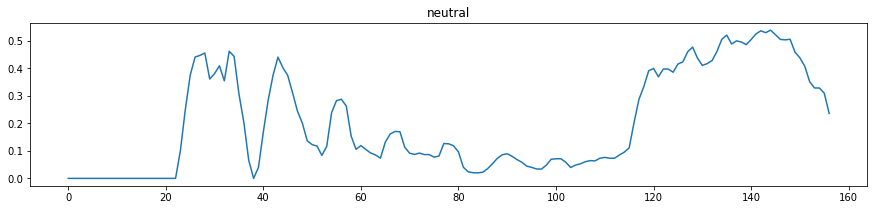

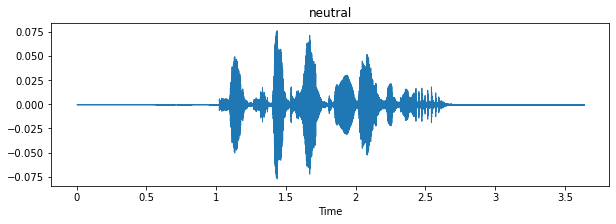

playing the emotion : neutral
EMOTION :  calm
Chroma Visualization for the emotion:  calm
Spectogram for the emotion  calm
Zero Crossing rate for the emotion  calm
Zero crossing rate: 10415


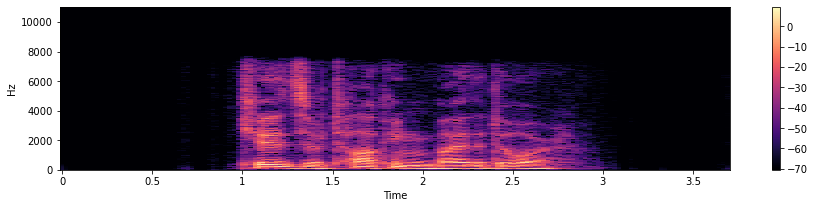

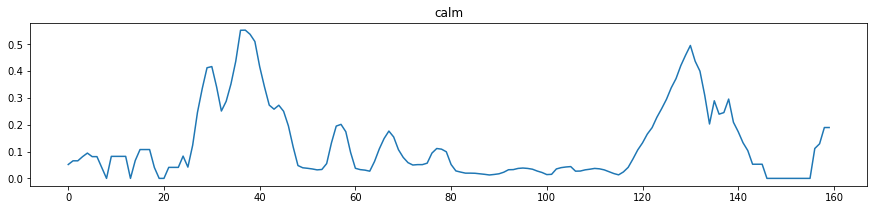

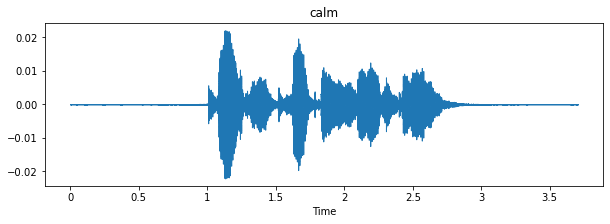

playing the emotion : calm
EMOTION :  happy
Chroma Visualization for the emotion:  happy
Spectogram for the emotion  happy
Zero Crossing rate for the emotion  happy
Zero crossing rate: 17861


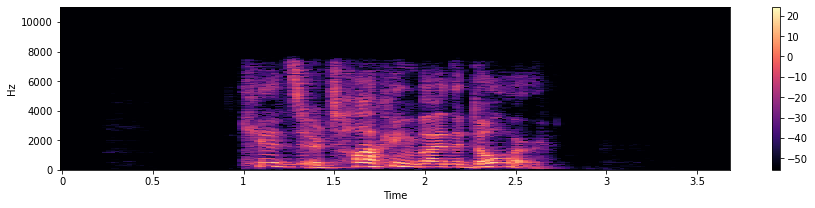

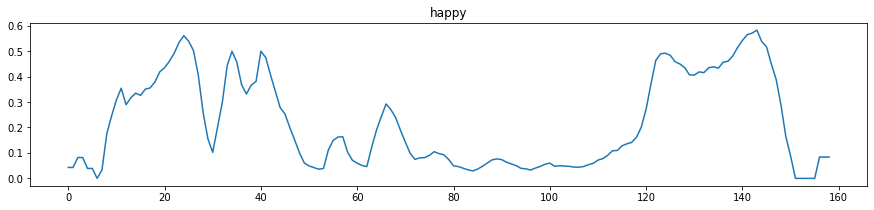

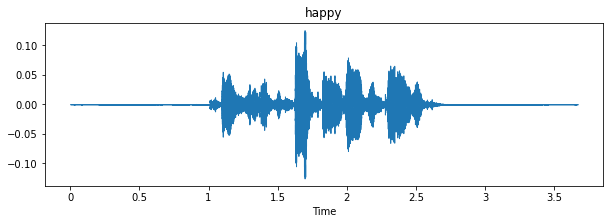

playing the emotion : happy
EMOTION :  sad
Chroma Visualization for the emotion:  sad
Spectogram for the emotion  sad
Zero Crossing rate for the emotion  sad
Zero crossing rate: 14335


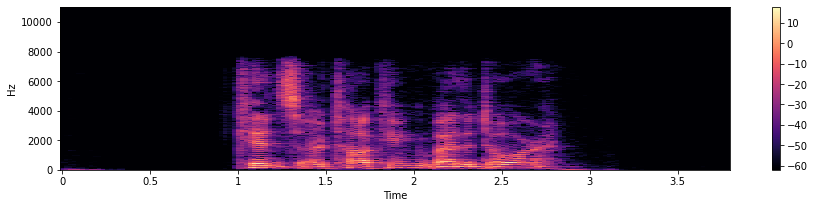

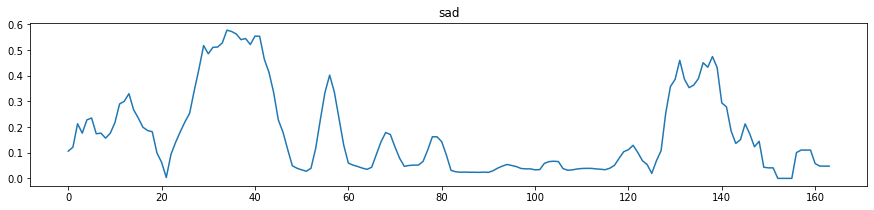

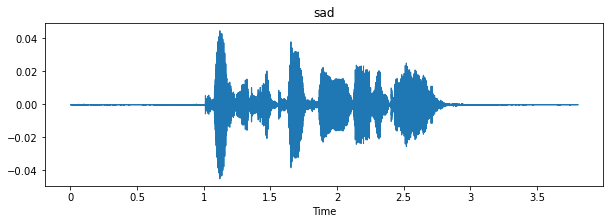

playing the emotion : sad
EMOTION :  angry
Chroma Visualization for the emotion:  angry
Spectogram for the emotion  angry
Zero Crossing rate for the emotion  angry
Zero crossing rate: 18376


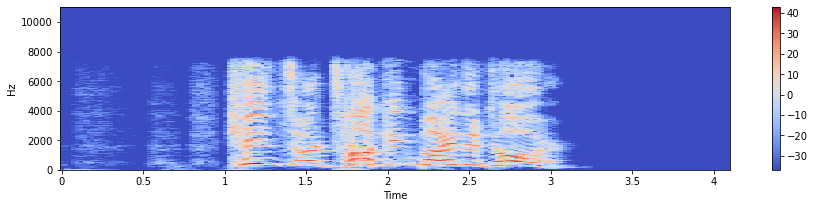

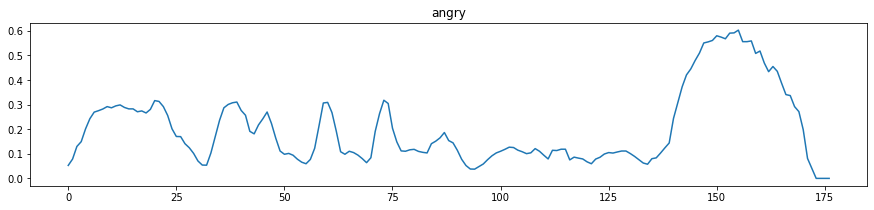

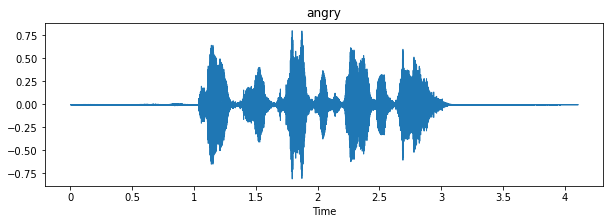

playing the emotion : angry
EMOTION :  fearful
Chroma Visualization for the emotion:  fearful
Spectogram for the emotion  fearful
Zero Crossing rate for the emotion  fearful
Zero crossing rate: 17533


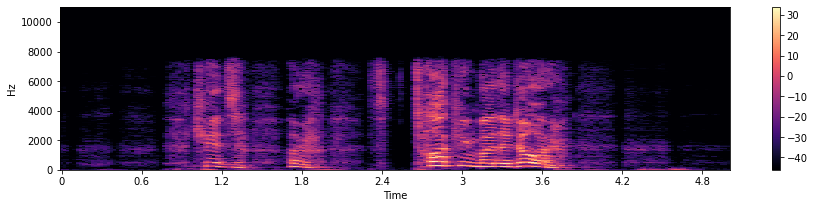

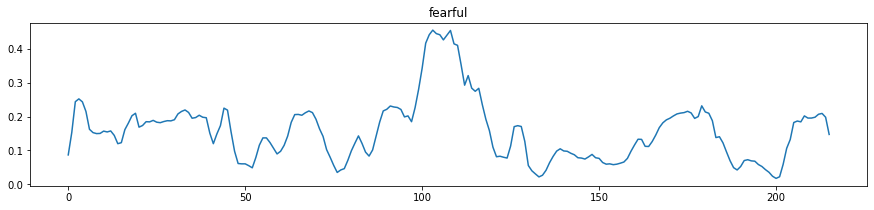

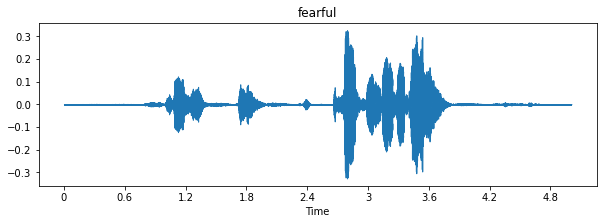

playing the emotion : fearful
EMOTION :  disgust
Chroma Visualization for the emotion:  disgust
Spectogram for the emotion  disgust
Zero Crossing rate for the emotion  disgust
Zero crossing rate: 17409


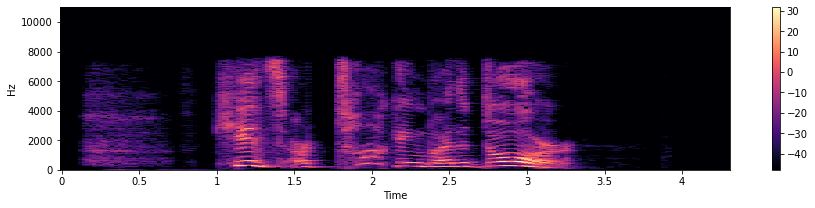

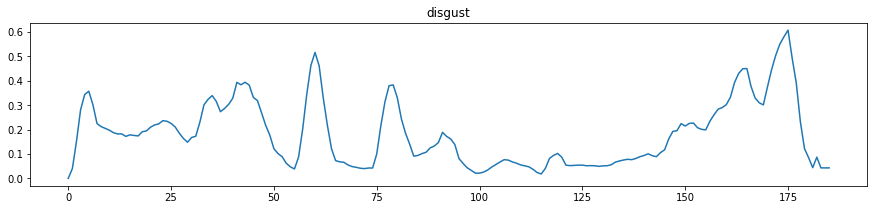

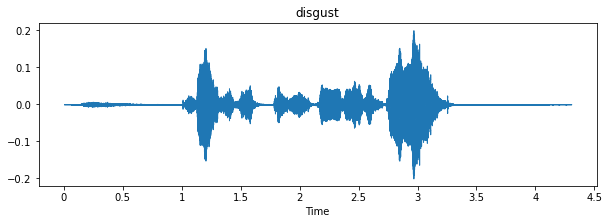

playing the emotion : disgust
EMOTION :  surprised
Chroma Visualization for the emotion:  surprised
Spectogram for the emotion  surprised
Zero Crossing rate for the emotion  surprised
Zero crossing rate: 8725


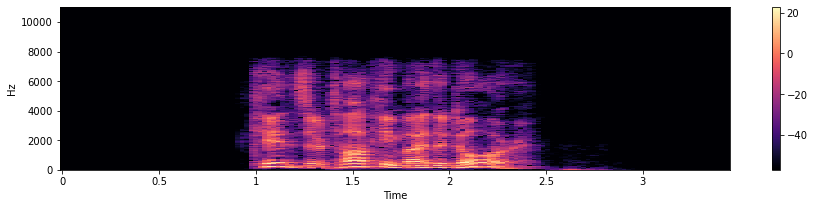

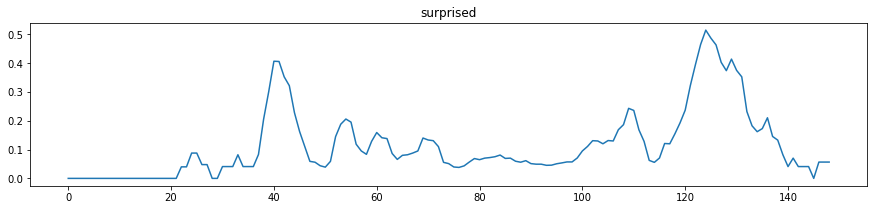

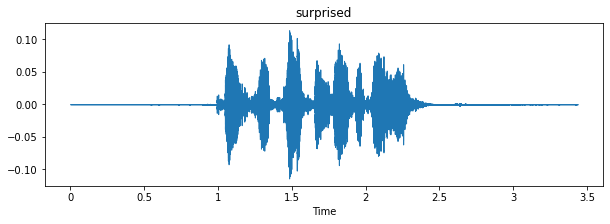

playing the emotion : surprised


In [6]:
emotions_list=['neutral','calm','happy','sad','angry','fearful','disgust','surprised']
for emotion in emotions_list :
    print("EMOTION : ",emotion)
    print("Chroma Visualization for the emotion: ",emotion)
    print("Spectogram for the emotion ",emotion)
    df=dataPath
    
    path=np.array(df.Paths[df.Emotions==emotion])[4]
    
    x, sr = librosa.load(path)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(15, 3))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    print("Zero Crossing rate for the emotion ",emotion)
    y, sr = librosa.load(path)
    zcrs = librosa.feature.zero_crossing_rate(y)
    print(f"Zero crossing rate: {sum(librosa.zero_crossings(y))}")
    plt.figure(figsize=(15, 3))
    plt.plot(zcrs[0])
    plt.title(emotion)
    data,samplingrate=librosa.load(path)
    waveplot(data,samplingrate,emotion)
    
    

In [7]:
def noise(data) :
    noiseAmp=0.035*np.random.uniform()*np.amax(data)
    data = data+noiseAmp*np.random.normal(size=data.shape[0])
    return data
def stretch(data,rate=0.8) :
    return librosa.effects.time_stretch(data,rate)
def shift(data) :
    shiftrange=int(np.random.uniform(low=-5,high=5)*1000)
    return np.roll(data,shiftrange)
def pitch(data,samplingRate,pitchFactor=0.7) :
    return librosa.effects.pitch_shift(data,samplingRate,pitchFactor)


Playing.......


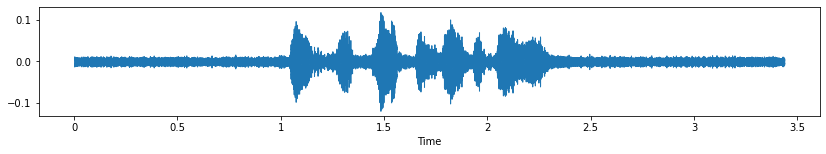

In [8]:
x=noise(data)
plt.figure(figsize=(14,2))
librosa.display.waveshow(y=x,sr=samplingrate)
song = AudioSegment.from_wav(path)
print("Playing.......")
play(song)



C:\Users\hp\AppData\Local\Temp\ipykernel_19968\554551220.py:6: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data,rate)


Playing.......


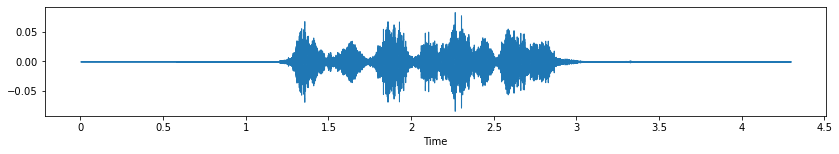

In [9]:
x=stretch(data)
plt.figure(figsize=(14,2))
librosa.display.waveshow(y=x,sr=samplingrate)
song = AudioSegment.from_wav(path)
print("Playing.......")
play(song)




Playing.......


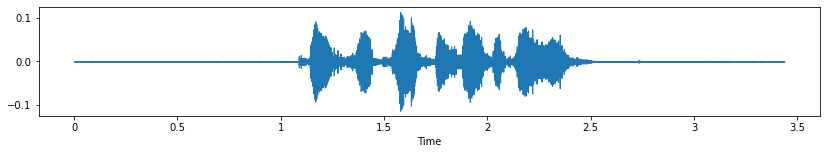

In [10]:
x=shift(data)
plt.figure(figsize=(14,2))
librosa.display.waveshow(y=x,sr=samplingrate)
song = AudioSegment.from_wav(path)
print("Playing.......")
play(song)



C:\Users\hp\AppData\Local\Temp\ipykernel_19968\554551220.py:11: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data,samplingRate,pitchFactor)


Playing.......


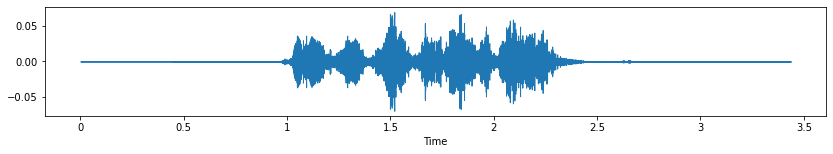

In [11]:
x=pitch(data,samplingrate)
plt.figure(figsize=(14,2))
librosa.display.waveshow(y=x,sr=samplingrate)
song = AudioSegment.from_wav(path)
print("Playing.......")
play(song)


# Feature Extraction

In [26]:
def extract_feature(file_name, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [27]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [28]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("dataset//Actor_*//*.wav"):
        print(file,end="")
        filename=os.path.basename(file)
        emotion=emotions[(filename.split("-")[2])]
        print("",emotion)
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [29]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)
print(x_train.shape)

dataset\Actor_01\03-01-01-01-01-01-01.wav neutral
dataset\Actor_01\03-01-01-01-01-02-01.wav neutral
dataset\Actor_01\03-01-01-01-02-01-01.wav neutral
dataset\Actor_01\03-01-01-01-02-02-01.wav neutral
dataset\Actor_01\03-01-02-01-01-01-01.wav calm
dataset\Actor_01\03-01-02-01-01-02-01.wav

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


 calm
dataset\Actor_01\03-01-02-01-02-01-01.wav calm
dataset\Actor_01\03-01-02-01-02-02-01.wav calm
dataset\Actor_01\03-01-02-02-01-01-01.wav calm
dataset\Actor_01\03-01-02-02-01-02-01.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(l

dataset\Actor_01\03-01-02-02-02-01-01.wav calm
dataset\Actor_01\03-01-02-02-02-02-01.wav calm
dataset\Actor_01\03-01-03-01-01-01-01.wav happy
dataset\Actor_01\03-01-03-01-01-02-01.wav happy
dataset\Actor_01\03-01-03-01-02-01-01.wav happy
dataset\Actor_01\03-01-03-01-02-02-01.wav happy
dataset\Actor_01\03-01-03-02-01-01-01.wav happy
dataset\Actor_01\03-01-03-02-01-02-01.wav happy
dataset\Actor_01\03-01-03-02-02-01-01.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_01\03-01-03-02-02-02-01.wav happy
dataset\Actor_01\03-01-04-01-01-01-01.wav sad
dataset\Actor_01\03-01-04-01-01-02-01.wav sad
dataset\Actor_01\03-01-04-01-02-01-01.wav sad
dataset\Actor_01\03-01-04-01-02-02-01.wav sad
dataset\Actor_01\03-01-04-02-01-01-01.wav sad
dataset\Actor_01\03-01-04-02-01-02-01.wav sad
dataset\Actor_01\03-01-04-02-02-01-01.wav sad
dataset\Actor_01\03-01-04-02-02-02-01.wav sad
dataset\Actor_01\03-01-05-01-01-01-01.wav angry
dataset\Actor_01\03-01-05-01-01-02-01.wav angry
dataset\Actor_01\03-01-05-01-02-01-01.wav angry
dataset\Actor_01\03-01-05-01-02-02-01.wav angry
dataset\Actor_01\03-01-05-02-01-01-01.wav angry
dataset\Actor_01\03-01-05-02-01-02-01.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00061035 -0.00048828 -0.00039673 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.00231934  0.00213623 -0.00231934 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=samp

dataset\Actor_01\03-01-05-02-02-01-01.wav angry
dataset\Actor_01\03-01-05-02-02-02-01.wav angry
dataset\Actor_01\03-01-06-01-01-01-01.wav fearful
dataset\Actor_01\03-01-06-01-01-02-01.wav fearful
dataset\Actor_01\03-01-06-01-02-01-01.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 7.3242188e-04  1.0986328e-03 -6.7138672e-04 ...  9.1552734e-05
  3.6621094e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00033569 0.00024414 0.00024414 ... 0.00036621 0.00033569 0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.mels

dataset\Actor_01\03-01-06-01-02-02-01.wav fearful
dataset\Actor_01\03-01-06-02-01-01-01.wav fearful
dataset\Actor_01\03-01-06-02-01-02-01.wav fearful
dataset\Actor_01\03-01-06-02-02-01-01.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[5.1879883e-04 2.4414062e-04 1.5258789e-04 ... 0.0000000e+00 0.0000000e+00
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -1.2207031e-04 -6.1035156e-05 ...  1.0986328e-03
  3.3569336e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[2.5726318e-02 3.1707764e-02 3.5552979e-02 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(l

dataset\Actor_01\03-01-06-02-02-02-01.wav fearful
dataset\Actor_01\03-01-07-01-01-01-01.wav disgust
dataset\Actor_01\03-01-07-01-01-02-01.wav disgust
dataset\Actor_01\03-01-07-01-02-01-01.wav disgust
dataset\Actor_01\03-01-07-01-02-02-01.wav disgust
dataset\Actor_01\03-01-07-02-01-01-01.wav disgust
dataset\Actor_01\03-01-07-02-01-02-01.wav disgust
dataset\Actor_01\03-01-07-02-02-01-01.wav disgust
dataset\Actor_01\03-01-07-02-02-02-01.wav disgust
dataset\Actor_01\03-01-08-01-01-01-01.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.0375977e-03 -7.9345703e-04 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 2.7465820e-04 5.1879883e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_01\03-01-08-01-01-02-01.wav surprised
dataset\Actor_01\03-01-08-01-02-01-01.wav surprised
dataset\Actor_01\03-01-08-01-02-02-01.wav surprised
dataset\Actor_01\03-01-08-02-01-01-01.wav surprised
dataset\Actor_01\03-01-08-02-01-02-01.wav surprised
dataset\Actor_01\03-01-08-02-02-01-01.wav surprised
dataset\Actor_01\03-01-08-02-02-02-01.wav surprised
dataset\Actor_02\03-01-01-01-01-01-02.wav neutral
dataset\Actor_02\03-01-01-01-01-02-02.wav neutral
dataset\Actor_02\03-01-01-01-02-01-02.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_02\03-01-01-01-02-02-02.wav neutral
dataset\Actor_02\03-01-02-01-01-01-02.wav calm
dataset\Actor_02\03-01-02-01-01-02-02.wav calm
dataset\Actor_02\03-01-02-01-02-01-02.wav calm
dataset\Actor_02\03-01-02-01-02-02-02.wav calm
dataset\Actor_02\03-01-02-02-01-01-02.wav calm
dataset\Actor_02\03-01-02-02-01-02-02.wav calm
dataset\Actor_02\03-01-02-02-02-01-02.wav calm
dataset\Actor_02\03-01-02-02-02-02-02.wav calm
dataset\Actor_02\03-01-03-01-01-01-02.wav happy
dataset\Actor_02\03-01-03-01-01-02-02.wav happy
dataset\Actor_02\03-01-03-01-02-01-02.wav happy
dataset\Actor_02\03-01-03-01-02-02-02.wav happy
dataset\Actor_02\03-01-03-02-01-01-02.wav happy
dataset\Actor_02\03-01-03-02-01-02-02.wav happy
dataset\Actor_02\03-01-03-02-02-01-02.wav happy
dataset\Actor_02\03-01-03-02-02-02-02.wav happy
dataset\Actor_02\03-01-04-01-01-01-02.wav sad
dataset\Actor_02\03-01-04-01-01-02-02.wav sad
dataset\Actor_02\03-01-04-01-02-01-02.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_02\03-01-04-01-02-02-02.wav sad
dataset\Actor_02\03-01-04-02-01-01-02.wav sad
dataset\Actor_02\03-01-04-02-01-02-02.wav sad
dataset\Actor_02\03-01-04-02-02-01-02.wav sad
dataset\Actor_02\03-01-04-02-02-02-02.wav sad
dataset\Actor_02\03-01-05-01-01-01-02.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_02\03-01-05-01-01-02-02.wav angry
dataset\Actor_02\03-01-05-01-02-01-02.wav angry
dataset\Actor_02\03-01-05-01-02-02-02.wav angry
dataset\Actor_02\03-01-05-02-01-01-02.wav angry
dataset\Actor_02\03-01-05-02-01-02-02.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_02\03-01-05-02-02-01-02.wav angry
dataset\Actor_02\03-01-05-02-02-02-02.wav angry
dataset\Actor_02\03-01-06-01-01-01-02.wav fearful
dataset\Actor_02\03-01-06-01-01-02-02.wav fearful
dataset\Actor_02\03-01-06-01-02-01-02.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -1.2207031e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_02\03-01-06-01-02-02-02.wav fearful
dataset\Actor_02\03-01-06-02-01-01-02.wav fearful
dataset\Actor_02\03-01-06-02-01-02-02.wav fearful
dataset\Actor_02\03-01-06-02-02-01-02.wav fearful
dataset\Actor_02\03-01-06-02-02-02-02.wav fearful
dataset\Actor_02\03-01-07-01-01-01-02.wav disgust
dataset\Actor_02\03-01-07-01-01-02-02.wav disgust
dataset\Actor_02\03-01-07-01-02-01-02.wav disgust
dataset\Actor_02\03-01-07-01-02-02-02.wav disgust
dataset\Actor_02\03-01-07-02-01-01-02.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_02\03-01-07-02-01-02-02.wav disgust
dataset\Actor_02\03-01-07-02-02-01-02.wav disgust
dataset\Actor_02\03-01-07-02-02-02-02.wav disgust
dataset\Actor_02\03-01-08-01-01-01-02.wav surprised
dataset\Actor_02\03-01-08-01-01-02-02.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(l

dataset\Actor_02\03-01-08-01-02-01-02.wav surprised
dataset\Actor_02\03-01-08-01-02-02-02.wav surprised
dataset\Actor_02\03-01-08-02-01-01-02.wav surprised
dataset\Actor_02\03-01-08-02-01-02-02.wav surprised
dataset\Actor_02\03-01-08-02-02-01-02.wav surprised
dataset\Actor_02\03-01-08-02-02-02-02.wav surprised
dataset\Actor_03\03-01-01-01-01-01-03.wav neutral
dataset\Actor_03\03-01-01-01-01-02-03.wav neutral
dataset\Actor_03\03-01-01-01-02-01-03.wav neutral
dataset\Actor_03\03-01-01-01-02-02-03.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  6.1035156e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_03\03-01-02-01-01-01-03.wav calm
dataset\Actor_03\03-01-02-01-01-02-03.wav calm
dataset\Actor_03\03-01-02-01-02-01-03.wav calm
dataset\Actor_03\03-01-02-01-02-02-03.wav calm
dataset\Actor_03\03-01-02-02-01-01-03.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 1.2207031e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8310547e-04 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(l

dataset\Actor_03\03-01-02-02-01-02-03.wav calm
dataset\Actor_03\03-01-02-02-02-01-03.wav calm
dataset\Actor_03\03-01-02-02-02-02-03.wav calm
dataset\Actor_03\03-01-03-01-01-01-03.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00027466 ... -0.00015259 -0.00015259
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.00015259 0.00015259 ... 0.00024414 0.00024414 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  9.1552734e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X

dataset\Actor_03\03-01-03-01-01-02-03.wav happy
dataset\Actor_03\03-01-03-01-02-01-03.wav happy
dataset\Actor_03\03-01-03-01-02-02-03.wav happy
dataset\Actor_03\03-01-03-02-01-01-03.wav happy
dataset\Actor_03\03-01-03-02-01-02-03.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 1.2207031e-04  1.5258789e-04 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00027466 -0.00024414 -0.00027466 ... -0.00015259 -0.00021362
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-04 -1.0986328e-03 ...  2.7465820e-04
  3.0517578e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

dataset\Actor_03\03-01-03-02-02-01-03.wav happy
dataset\Actor_03\03-01-03-02-02-02-03.wav happy
dataset\Actor_03\03-01-04-01-01-01-03.wav sad
dataset\Actor_03\03-01-04-01-01-02-03.wav sad
dataset\Actor_03\03-01-04-01-02-01-03.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00042725 -0.00039673
 -0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  2.7465820e-04
  3.0517578e-04  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

dataset\Actor_03\03-01-04-01-02-02-03.wav sad
dataset\Actor_03\03-01-04-02-01-01-03.wav sad
dataset\Actor_03\03-01-04-02-01-02-03.wav sad
dataset\Actor_03\03-01-04-02-02-01-03.wav sad
dataset\Actor_03\03-01-04-02-02-02-03.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00247192 0.00247192 0.00244141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2207031e-04 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -1.8310547e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featur

dataset\Actor_03\03-01-05-01-01-01-03.wav angry
dataset\Actor_03\03-01-05-01-01-02-03.wav angry
dataset\Actor_03\03-01-05-01-02-01-03.wav angry
dataset\Actor_03\03-01-05-01-02-02-03.wav angry
dataset\Actor_03\03-01-05-02-01-01-03.wav

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -3.0517578e-05  3.0517578e-05 ... -5.8593750e-03
 -5.8898926e-03 -6.0729980e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.8310547e-04  1.2207031e-04  3.0517578e-04 ... -1.8310547e-04
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.4086914e-04  2.7465820e-04 -6.1035156e-05 ... -1.7089844e-03
 -1.8615723e-03 -1.8005371e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

 angry
dataset\Actor_03\03-01-05-02-01-02-03.wav angry
dataset\Actor_03\03-01-05-02-02-01-03.wav angry
dataset\Actor_03\03-01-05-02-02-02-03.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 9.4604492e-04 7.0190430e-04
 8.8500977e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00021362 -0.00033569
 -0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -1.5258789e-04
 -1.5258789e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featu

dataset\Actor_03\03-01-06-01-01-01-03.wav fearful
dataset\Actor_03\03-01-06-01-01-02-03.wav fearful
dataset\Actor_03\03-01-06-01-02-01-03.wav fearful
dataset\Actor_03\03-01-06-01-02-02-03.wav fearful
dataset\Actor_03\03-01-06-02-01-01-03.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.00018311  0.00018311  0.00018311 ...  0.00027466  0.00021362
 -0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.01373291 -0.01370239 -0.01379395 ... -0.00057983 -0.00180054
 -0.00396729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00033569 -0.00045776 -0.00042725 ... -0.00082397 -0.00082397
 -0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample

dataset\Actor_03\03-01-06-02-01-02-03.wav fearful
dataset\Actor_03\03-01-06-02-02-01-03.wav fearful
dataset\Actor_03\03-01-06-02-02-02-03.wav fearful
dataset\Actor_03\03-01-07-01-01-01-03.wav disgust
dataset\Actor_03\03-01-07-01-01-02-03.wav disgust
dataset\Actor_03\03-01-07-01-02-01-03.wav disgust
dataset\Actor_03\03-01-07-01-02-02-03.wav disgust
dataset\Actor_03\03-01-07-02-01-01-03.wav disgust
dataset\Actor_03\03-01-07-02-01-02-03.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.5258789e-04 -2.7465820e-04 -3.3569336e-04 ...  0.0000000e+00
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00015259 -0.00036621
 -0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -3.0517578e-05 ...  5.4931641e-04
  3.9672852e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

dataset\Actor_03\03-01-07-02-02-01-03.wav disgust
dataset\Actor_03\03-01-07-02-02-02-03.wav disgust
dataset\Actor_03\03-01-08-01-01-01-03.wav surprised
dataset\Actor_03\03-01-08-01-01-02-03.wav surprised
dataset\Actor_03\03-01-08-01-02-01-03.wav

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0007019   0.0012207   0.00125122 ...  0.          0.00039673
 -0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.8310547e-04
 -6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

 surprised
dataset\Actor_03\03-01-08-01-02-02-03.wav surprised
dataset\Actor_03\03-01-08-02-01-01-03.wav surprised
dataset\Actor_03\03-01-08-02-01-02-03.wav surprised
dataset\Actor_03\03-01-08-02-02-01-03.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2207031e-04 1.5258789e-04
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00039673 0.00033569 0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.mels

dataset\Actor_03\03-01-08-02-02-02-03.wav surprised
dataset\Actor_04\03-01-01-01-01-01-04.wav neutral
dataset\Actor_04\03-01-01-01-01-02-04.wav neutral
dataset\Actor_04\03-01-01-01-02-01-04.wav neutral
dataset\Actor_04\03-01-01-01-02-02-04.wav neutral
dataset\Actor_04\03-01-02-01-01-01-04.wav calm
dataset\Actor_04\03-01-02-01-01-02-04.wav calm
dataset\Actor_04\03-01-02-01-02-01-04.wav calm
dataset\Actor_04\03-01-02-01-02-02-04.wav calm
dataset\Actor_04\03-01-02-02-01-01-04.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_04\03-01-02-02-01-02-04.wav calm
dataset\Actor_04\03-01-02-02-02-01-04.wav calm
dataset\Actor_04\03-01-02-02-02-02-04.wav calm
dataset\Actor_04\03-01-03-01-01-01-04.wav happy
dataset\Actor_04\03-01-03-01-01-02-04.wav happy
dataset\Actor_04\03-01-03-01-02-01-04.wav happy
dataset\Actor_04\03-01-03-01-02-02-04.wav happy
dataset\Actor_04\03-01-03-02-01-01-04.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_04\03-01-03-02-01-02-04.wav happy
dataset\Actor_04\03-01-03-02-02-01-04.wav happy
dataset\Actor_04\03-01-03-02-02-02-04.wav happy
dataset\Actor_04\03-01-04-01-01-01-04.wav sad
dataset\Actor_04\03-01-04-01-01-02-04.wav sad
dataset\Actor_04\03-01-04-01-02-01-04.wav sad
dataset\Actor_04\03-01-04-01-02-02-04.wav sad
dataset\Actor_04\03-01-04-02-01-01-04.wav sad
dataset\Actor_04\03-01-04-02-01-02-04.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_04\03-01-04-02-02-01-04.wav sad
dataset\Actor_04\03-01-04-02-02-02-04.wav sad
dataset\Actor_04\03-01-05-01-01-01-04.wav angry
dataset\Actor_04\03-01-05-01-01-02-04.wav angry
dataset\Actor_04\03-01-05-01-02-01-04.wav angry
dataset\Actor_04\03-01-05-01-02-02-04.wav angry
dataset\Actor_04\03-01-05-02-01-01-04.wav angry
dataset\Actor_04\03-01-05-02-01-02-04.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_04\03-01-05-02-02-01-04.wav angry
dataset\Actor_04\03-01-05-02-02-02-04.wav angry
dataset\Actor_04\03-01-06-01-01-01-04.wav fearful
dataset\Actor_04\03-01-06-01-01-02-04.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_04\03-01-06-01-02-01-04.wav fearful
dataset\Actor_04\03-01-06-01-02-02-04.wav fearful
dataset\Actor_04\03-01-06-02-01-01-04.wav fearful
dataset\Actor_04\03-01-06-02-01-02-04.wav fearful
dataset\Actor_04\03-01-06-02-02-01-04.wav fearful
dataset\Actor_04\03-01-06-02-02-02-04.wav fearful
dataset\Actor_04\03-01-07-01-01-01-04.wav disgust
dataset\Actor_04\03-01-07-01-01-02-04.wav disgust
dataset\Actor_04\03-01-07-01-02-01-04.wav disgust
dataset\Actor_04\03-01-07-01-02-02-04.wav disgust
dataset\Actor_04\03-01-07-02-01-01-04.wav disgust
dataset\Actor_04\03-01-07-02-01-02-04.wav disgust
dataset\Actor_04\03-01-07-02-02-01-04.wav disgust
dataset\Actor_04\03-01-07-02-02-02-04.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -1.8310547e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_04\03-01-08-01-01-01-04.wav surprised
dataset\Actor_04\03-01-08-01-01-02-04.wav surprised
dataset\Actor_04\03-01-08-01-02-01-04.wav surprised
dataset\Actor_04\03-01-08-01-02-02-04.wav surprised
dataset\Actor_04\03-01-08-02-01-01-04.wav surprised
dataset\Actor_04\03-01-08-02-01-02-04.wav surprised
dataset\Actor_04\03-01-08-02-02-01-04.wav surprised
dataset\Actor_04\03-01-08-02-02-02-04.wav surprised
dataset\Actor_05\03-01-01-01-01-01-05.wav 

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

neutral
dataset\Actor_05\03-01-01-01-01-02-05.wav neutral
dataset\Actor_05\03-01-01-01-02-01-05.wav neutral
dataset\Actor_05\03-01-01-01-02-02-05.wav neutral
dataset\Actor_05\03-01-02-01-01-01-05.wav calm
dataset\Actor_05\03-01-02-01-01-02-05.wav calm
dataset\Actor_05\03-01-02-01-02-01-05.wav calm
dataset\Actor_05\03-01-02-01-02-02-05.wav calm
dataset\Actor_05\03-01-02-02-01-01-05.wav calm
dataset\Actor_05\03-01-02-02-01-02-05.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_05\03-01-02-02-02-01-05.wav calm
dataset\Actor_05\03-01-02-02-02-02-05.wav calm
dataset\Actor_05\03-01-03-01-01-01-05.wav happy
dataset\Actor_05\03-01-03-01-01-02-05.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_05\03-01-03-01-02-01-05.wav happy
dataset\Actor_05\03-01-03-01-02-02-05.wav happy
dataset\Actor_05\03-01-03-02-01-01-05.wav happy
dataset\Actor_05\03-01-03-02-01-02-05.wav happy
dataset\Actor_05\03-01-03-02-02-01-05.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  0.0000000e+00
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_05\03-01-03-02-02-02-05.wav happy
dataset\Actor_05\03-01-04-01-01-01-05.wav sad
dataset\Actor_05\03-01-04-01-01-02-05.wav sad
dataset\Actor_05\03-01-04-01-02-01-05.wav sad
dataset\Actor_05\03-01-04-01-02-02-05.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[9.1552734e-05 6.1035156e-05 6.1035156e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(l

dataset\Actor_05\03-01-04-02-01-01-05.wav sad
dataset\Actor_05\03-01-04-02-01-02-05.wav sad
dataset\Actor_05\03-01-04-02-02-01-05.wav sad
dataset\Actor_05\03-01-04-02-02-02-05.wav sad
dataset\Actor_05\03-01-05-01-01-01-05.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00054932 0.00057983 0.00057983 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_05\03-01-05-01-01-02-05.wav angry
dataset\Actor_05\03-01-05-01-02-01-05.wav angry
dataset\Actor_05\03-01-05-01-02-02-05.wav angry
dataset\Actor_05\03-01-05-02-01-01-05.wav angry
dataset\Actor_05\03-01-05-02-01-02-05.wav angry
dataset\Actor_05\03-01-05-02-02-01-05.wav angry
dataset\Actor_05\03-01-05-02-02-02-05.wav angry
dataset\Actor_05\03-01-06-01-01-01-05.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -9.1552734e-05 ...  4.2724609e-04
  4.2724609e-04  4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_05\03-01-06-01-01-02-05.wav fearful
dataset\Actor_05\03-01-06-01-02-01-05.wav fearful
dataset\Actor_05\03-01-06-01-02-02-05.wav fearful
dataset\Actor_05\03-01-06-02-01-01-05.wav fearful
dataset\Actor_05\03-01-06-02-01-02-05.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -1.2207031e-04 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_05\03-01-06-02-02-01-05.wav fearful
dataset\Actor_05\03-01-06-02-02-02-05.wav fearful
dataset\Actor_05\03-01-07-01-01-01-05.wav disgust
dataset\Actor_05\03-01-07-01-01-02-05.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 7.6293945e-04 -3.0517578e-05  0.0000000e+00 ... -1.2207031e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_05\03-01-07-01-02-01-05.wav disgust
dataset\Actor_05\03-01-07-01-02-02-05.wav disgust
dataset\Actor_05\03-01-07-02-01-01-05.wav disgust
dataset\Actor_05\03-01-07-02-01-02-05.wav disgust
dataset\Actor_05\03-01-07-02-02-01-05.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_05\03-01-07-02-02-02-05.wav disgust
dataset\Actor_05\03-01-08-01-01-01-05.wav surprised
dataset\Actor_05\03-01-08-01-01-02-05.wav surprised
dataset\Actor_05\03-01-08-01-02-01-05.wav surprised
dataset\Actor_05\03-01-08-01-02-02-05.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00012207 0.00012207 0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_05\03-01-08-02-01-01-05.wav surprised
dataset\Actor_05\03-01-08-02-01-02-05.wav surprised
dataset\Actor_05\03-01-08-02-02-01-05.wav surprised
dataset\Actor_05\03-01-08-02-02-02-05.wav surprised
dataset\Actor_06\03-01-01-01-01-01-06.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_06\03-01-01-01-01-02-06.wav neutral
dataset\Actor_06\03-01-01-01-02-01-06.wav neutral
dataset\Actor_06\03-01-01-01-02-02-06.wav neutral
dataset\Actor_06\03-01-02-01-01-01-06.wav calm
dataset\Actor_06\03-01-02-01-01-02-06.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 6.1035156e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00018311 -0.00015259
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_06\03-01-02-01-02-01-06.wav calm
dataset\Actor_06\03-01-02-01-02-02-06.wav calm
dataset\Actor_06\03-01-02-02-01-01-06.wav calm
dataset\Actor_06\03-01-02-02-01-02-06.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_06\03-01-02-02-02-01-06.wav calm
dataset\Actor_06\03-01-02-02-02-02-06.wav calm
dataset\Actor_06\03-01-03-01-01-01-06.wav happy
dataset\Actor_06\03-01-03-01-01-02-06.wav happy
dataset\Actor_06\03-01-03-01-02-01-06.wav happy
dataset\Actor_06\03-01-03-01-02-02-06.wav happy
dataset\Actor_06\03-01-03-02-01-01-06.wav happy
dataset\Actor_06\03-01-03-02-01-02-06.wav happy
dataset\Actor_06\03-01-03-02-02-01-06.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -3.0517578e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_06\03-01-03-02-02-02-06.wav happy
dataset\Actor_06\03-01-04-01-01-01-06.wav sad
dataset\Actor_06\03-01-04-01-01-02-06.wav sad
dataset\Actor_06\03-01-04-01-02-01-06.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 6.1035156e-04 6.1035156e-04
 5.7983398e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_06\03-01-04-01-02-02-06.wav sad
dataset\Actor_06\03-01-04-02-01-01-06.wav sad
dataset\Actor_06\03-01-04-02-01-02-06.wav sad
dataset\Actor_06\03-01-04-02-02-01-06.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00024414 0.00021362 0.00021362 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_06\03-01-04-02-02-02-06.wav sad
dataset\Actor_06\03-01-05-01-01-01-06.wav angry
dataset\Actor_06\03-01-05-01-01-02-06.wav angry
dataset\Actor_06\03-01-05-01-02-01-06.wav angry
dataset\Actor_06\03-01-05-01-02-02-06.wav

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00015259 0.00015259 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


 angry
dataset\Actor_06\03-01-05-02-01-01-06.wav angry
dataset\Actor_06\03-01-05-02-01-02-06.wav angry
dataset\Actor_06\03-01-05-02-02-01-06.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 8.2397461e-04  5.1879883e-04  3.0517578e-04 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 9.1552734e-05 -3.0517578e-05 -4.8828125e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_06\03-01-05-02-02-02-06.wav angry
dataset\Actor_06\03-01-06-01-01-01-06.wav fearful
dataset\Actor_06\03-01-06-01-01-02-06.wav fearful
dataset\Actor_06\03-01-06-01-02-01-06.wav fearful
dataset\Actor_06\03-01-06-01-02-02-06.wav fearful
dataset\Actor_06\03-01-06-02-01-01-06.wav fearful
dataset\Actor_06\03-01-06-02-01-02-06.wav fearful
dataset\Actor_06\03-01-06-02-02-01-06.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2817383e-03 -1.6479492e-03 -3.0517578e-05 ...  4.2724609e-04
  5.1879883e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.6621094e-04  2.4414062e-04 -3.6621094e-04 ...  3.0517578e-05
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 2.1362305e-04  1.5258789e-04 -3.0517578e-05 ...  4.8828125e-04
  3.0517578e-05 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_06\03-01-06-02-02-02-06.wav fearful
dataset\Actor_06\03-01-07-01-01-01-06.wav disgust
dataset\Actor_06\03-01-07-01-01-02-06.wav disgust
dataset\Actor_06\03-01-07-01-02-01-06.wav disgust
dataset\Actor_06\03-01-07-01-02-02-06.wav disgust
dataset\Actor_06\03-01-07-02-01-01-06.wav disgust
dataset\Actor_06\03-01-07-02-01-02-06.wav disgust
dataset\Actor_06\03-01-07-02-02-01-06.wav disgust
dataset\Actor_06\03-01-07-02-02-02-06.wav disgust
dataset\Actor_06\03-01-08-01-01-01-06.wav surprised
dataset\Actor_06\03-01-08-01-01-02-06.wav surprised
dataset\Actor_06\03-01-08-01-02-01-06.wav surprised
dataset\Actor_06\03-01-08-01-02-02-06.wav surprised
dataset\Actor_06\03-01-08-02-01-01-06.wav surprised
dataset\Actor_06\03-01-08-02-01-02-06.wav surprised
dataset\Actor_06\03-01-08-02-02-01-06.wav surprised
dataset\Actor_06\03-01-08-02-02-02-06.wav surprised
dataset\Actor_07\03-01-01-01-01-01-07.wav neutral
dataset\Actor_07\03-01-01-01-01-02-07.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  9.1552734e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-2.1362305e-04 -1.8310547e-04  6.1035156e-05 ... -1.5258789e-04
 -1.8310547e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_07\03-01-01-01-02-01-07.wav neutral
dataset\Actor_07\03-01-01-01-02-02-07.wav neutral
dataset\Actor_07\03-01-02-01-01-01-07.wav calm
dataset\Actor_07\03-01-02-01-01-02-07.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -1.5258789e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_07\03-01-02-01-02-01-07.wav calm
dataset\Actor_07\03-01-02-01-02-02-07.wav calm
dataset\Actor_07\03-01-02-02-01-01-07.wav calm
dataset\Actor_07\03-01-02-02-01-02-07.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-04 -3.0517578e-05  6.1035156e-05 ... -1.0375977e-03
 -9.7656250e-04 -1.0375977e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05 -2.4414062e-04 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -1.2207031e-04 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_07\03-01-02-02-02-01-07.wav calm
dataset\Actor_07\03-01-02-02-02-02-07.wav calm
dataset\Actor_07\03-01-03-01-01-01-07.wav happy
dataset\Actor_07\03-01-03-01-01-02-07.wav happy
dataset\Actor_07\03-01-03-01-02-01-07.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05  0.0000000e+00  3.0517578e-05 ...  2.7465820e-04
  2.4414062e-04  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  6.1035156e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 2.1362305e-04  7.9345703e-04 -1.2207031e-04 ...  6.1035156e-05
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_07\03-01-03-01-02-02-07.wav happy
dataset\Actor_07\03-01-03-02-01-01-07.wav happy
dataset\Actor_07\03-01-03-02-01-02-07.wav happy
dataset\Actor_07\03-01-03-02-02-01-07.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -3.3569336e-04
 -3.9672852e-04 -4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  4.2724609e-04  6.4086914e-04 ...  1.2207031e-04
  9.1552734e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_07\03-01-03-02-02-02-07.wav happy
dataset\Actor_07\03-01-04-01-01-01-07.wav sad
dataset\Actor_07\03-01-04-01-01-02-07.wav sad
dataset\Actor_07\03-01-04-01-02-01-07.wav sad
dataset\Actor_07\03-01-04-01-02-02-07.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05 -2.4414062e-04 -3.9672852e-04 ...  3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -3.0517578e-05  3.0517578e-05 ...  1.0681152e-03
  1.0681152e-03  1.0681152e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_07\03-01-04-02-01-01-07.wav sad
dataset\Actor_07\03-01-04-02-01-02-07.wav sad
dataset\Actor_07\03-01-04-02-02-01-07.wav sad
dataset\Actor_07\03-01-04-02-02-02-07.wav sad
dataset\Actor_07\03-01-05-01-01-01-07.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -8.2397461e-04
 -8.2397461e-04 -8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05  9.1552734e-05  1.2207031e-04 ... -2.1057129e-03
 -2.1362305e-03 -2.1362305e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00064087 -0.00057983 -0.00054932 ...  0.00231934  0.00228882
  0.00228882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

dataset\Actor_07\03-01-05-01-01-02-07.wav angry
dataset\Actor_07\03-01-05-01-02-01-07.wav angry
dataset\Actor_07\03-01-05-01-02-02-07.wav angry
dataset\Actor_07\03-01-05-02-01-01-07.wav angry
dataset\Actor_07\03-01-05-02-01-02-07.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.00012207  0.00015259  0.00012207 ... -0.00204468 -0.00201416
 -0.00204468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -1.8310547e-04 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.3569336e-04
 -3.3569336e-04 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

dataset\Actor_07\03-01-05-02-02-01-07.wav angry
dataset\Actor_07\03-01-05-02-02-02-07.wav angry
dataset\Actor_07\03-01-06-01-01-01-07.wav fearful
dataset\Actor_07\03-01-06-01-01-02-07.wav fearful
dataset\Actor_07\03-01-06-01-02-01-07.wav fearful
dataset\Actor_07\03-01-06-01-02-02-07.wav fearful
dataset\Actor_07\03-01-06-02-01-01-07.wav fearful
dataset\Actor_07\03-01-06-02-01-02-07.wav fearful
dataset\Actor_07\03-01-06-02-02-01-07.wav fearful
dataset\Actor_07\03-01-06-02-02-02-07.wav fearful
dataset\Actor_07\03-01-07-01-01-01-07.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[9.1552734e-05 6.1035156e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_07\03-01-07-01-01-02-07.wav disgust
dataset\Actor_07\03-01-07-01-02-01-07.wav disgust
dataset\Actor_07\03-01-07-01-02-02-07.wav disgust
dataset\Actor_07\03-01-07-02-01-01-07.wav disgust
dataset\Actor_07\03-01-07-02-01-02-07.wav disgust
dataset\Actor_07\03-01-07-02-02-01-07.wav disgust
dataset\Actor_07\03-01-07-02-02-02-07.wav disgust
dataset\Actor_07\03-01-08-01-01-01-07.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 9.1552734e-05 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_07\03-01-08-01-01-02-07.wav surprised
dataset\Actor_07\03-01-08-01-02-01-07.wav surprised
dataset\Actor_07\03-01-08-01-02-02-07.wav surprised
dataset\Actor_07\03-01-08-02-01-01-07.wav surprised
dataset\Actor_07\03-01-08-02-01-02-07.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2207031e-04
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(l

dataset\Actor_07\03-01-08-02-02-01-07.wav surprised
dataset\Actor_07\03-01-08-02-02-02-07.wav surprised
dataset\Actor_08\03-01-01-01-01-01-08.wav neutral
dataset\Actor_08\03-01-01-01-01-02-08.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[9.1552734e-05 9.1552734e-05 1.2207031e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00018311 0.00018311 0.00021362 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.mels

dataset\Actor_08\03-01-01-01-02-01-08.wav neutral
dataset\Actor_08\03-01-01-01-02-02-08.wav neutral
dataset\Actor_08\03-01-02-01-01-01-08.wav calm
dataset\Actor_08\03-01-02-01-01-02-08.wav calm
dataset\Actor_08\03-01-02-01-02-01-08.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.8310547e-04 -2.1362305e-04 -1.8310547e-04 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00015259 0.00015259 0.00015259 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -9.1552734e-05 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featur

dataset\Actor_08\03-01-02-01-02-02-08.wav calm
dataset\Actor_08\03-01-02-02-01-01-08.wav calm
dataset\Actor_08\03-01-02-02-01-02-08.wav calm
dataset\Actor_08\03-01-02-02-02-01-08.wav calm
dataset\Actor_08\03-01-02-02-02-02-08.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  1.2207031e-04
  1.2207031e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 9.1552734e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_08\03-01-03-01-01-01-08.wav happy
dataset\Actor_08\03-01-03-01-01-02-08.wav happy
dataset\Actor_08\03-01-03-01-02-01-08.wav happy
dataset\Actor_08\03-01-03-01-02-02-08.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -6.1035156e-05 ...  6.1035156e-05
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -3.6621094e-04
 -3.6621094e-04 -3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_08\03-01-03-02-01-01-08.wav happy
dataset\Actor_08\03-01-03-02-01-02-08.wav happy
dataset\Actor_08\03-01-03-02-02-01-08.wav happy
dataset\Actor_08\03-01-03-02-02-02-08.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -2.7465820e-04
 -2.1362305e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[2.4414062e-04 2.4414062e-04 2.4414062e-04 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_08\03-01-04-01-01-01-08.wav sad
dataset\Actor_08\03-01-04-01-01-02-08.wav sad
dataset\Actor_08\03-01-04-01-02-01-08.wav sad
dataset\Actor_08\03-01-04-01-02-02-08.wav sad
dataset\Actor_08\03-01-04-02-01-01-08.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 1.8310547e-04  2.1362305e-04  2.1362305e-04 ... -1.2207031e-04
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00088501 0.00076294 0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.mels

dataset\Actor_08\03-01-04-02-01-02-08.wav sad
dataset\Actor_08\03-01-04-02-02-01-08.wav sad
dataset\Actor_08\03-01-04-02-02-02-08.wav sad
dataset\Actor_08\03-01-05-01-01-01-08.wav angry
dataset\Actor_08\03-01-05-01-01-02-08.wav angry
dataset\Actor_08\03-01-05-01-02-01-08.wav angry
dataset\Actor_08\03-01-05-01-02-02-08.wav angry
dataset\Actor_08\03-01-05-02-01-01-08.wav angry
dataset\Actor_08\03-01-05-02-01-02-08.wav angry
dataset\Actor_08\03-01-05-02-02-01-08.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -9.1552734e-05 ...  0.0000000e+00
  6.1035156e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00018311 -0.00018311 -0.00018311 ...  0.00027466  0.00027466
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.00018311  0.00015259  0.00018311 ... -0.00021362 -0.00018311
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectr

dataset\Actor_08\03-01-05-02-02-02-08.wav angry
dataset\Actor_08\03-01-06-01-01-01-08.wav fearful
dataset\Actor_08\03-01-06-01-01-02-08.wav fearful
dataset\Actor_08\03-01-06-01-02-01-08.wav fearful
dataset\Actor_08\03-01-06-01-02-02-08.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[1.8310547e-04 1.8310547e-04 1.8310547e-04 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -1.8310547e-04
 -1.8310547e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_08\03-01-06-02-01-01-08.wav fearful
dataset\Actor_08\03-01-06-02-01-02-08.wav fearful
dataset\Actor_08\03-01-06-02-02-01-08.wav fearful
dataset\Actor_08\03-01-06-02-02-02-08.wav fearful
dataset\Actor_08\03-01-07-01-01-01-08.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.00018311  0.00018311  0.00015259 ... -0.00189209 -0.00192261
 -0.00195312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[1.2207031e-04 9.1552734e-05 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -6.9274902e-03
 -6.9580078e-03 -6.9274902e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featu

dataset\Actor_08\03-01-07-01-01-02-08.wav disgust
dataset\Actor_08\03-01-07-01-02-01-08.wav disgust
dataset\Actor_08\03-01-07-01-02-02-08.wav disgust
dataset\Actor_08\03-01-07-02-01-01-08.wav disgust
dataset\Actor_08\03-01-07-02-01-02-08.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00021362 -0.00021362 -0.00018311 ...  0.00015259  0.00012207
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -9.1552734e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -6.1035156e-05 ... -1.2207031e-04
  6.4086914e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

dataset\Actor_08\03-01-07-02-02-01-08.wav disgust
dataset\Actor_08\03-01-07-02-02-02-08.wav disgust
dataset\Actor_08\03-01-08-01-01-01-08.wav surprised
dataset\Actor_08\03-01-08-01-01-02-08.wav surprised
dataset\Actor_08\03-01-08-01-02-01-08.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5258789e-04 1.2207031e-04
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_08\03-01-08-01-02-02-08.wav surprised
dataset\Actor_08\03-01-08-02-01-01-08.wav surprised
dataset\Actor_08\03-01-08-02-01-02-08.wav surprised
dataset\Actor_08\03-01-08-02-02-01-08.wav surprised
dataset\Actor_08\03-01-08-02-02-02-08.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0005188  -0.00057983
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -1.2207031e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00018311 -0.00018311 -0.00015259 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X,

dataset\Actor_09\03-01-01-01-01-01-09.wav neutral
dataset\Actor_09\03-01-01-01-01-02-09.wav neutral
dataset\Actor_09\03-01-01-01-02-01-09.wav neutral
dataset\Actor_09\03-01-01-01-02-02-09.wav neutral
dataset\Actor_09\03-01-02-01-01-01-09.wav calm
dataset\Actor_09\03-01-02-01-01-02-09.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00033569 0.00036621 0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00100708 -0.00100708
 -0.00100708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X

dataset\Actor_09\03-01-02-01-02-01-09.wav calm
dataset\Actor_09\03-01-02-01-02-02-09.wav calm
dataset\Actor_09\03-01-02-02-01-01-09.wav calm
dataset\Actor_09\03-01-02-02-01-02-09.wav calm
dataset\Actor_09\03-01-02-02-02-01-09.wav calm
dataset\Actor_09\03-01-02-02-02-02-09.wav calm
dataset\Actor_09\03-01-03-01-01-01-09.wav happy
dataset\Actor_09\03-01-03-01-01-02-09.wav happy
dataset\Actor_09\03-01-03-01-02-01-09.wav happy
dataset\Actor_09\03-01-03-01-02-02-09.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  1.2207031e-04 ... -3.0517578e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_09\03-01-03-02-01-01-09.wav happy
dataset\Actor_09\03-01-03-02-01-02-09.wav happy
dataset\Actor_09\03-01-03-02-02-01-09.wav happy
dataset\Actor_09\03-01-03-02-02-02-09.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0007019  0.00067139 0.00067139 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -1.2207031e-04
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featur

dataset\Actor_09\03-01-04-01-01-01-09.wav sad
dataset\Actor_09\03-01-04-01-01-02-09.wav sad
dataset\Actor_09\03-01-04-01-02-01-09.wav sad
dataset\Actor_09\03-01-04-01-02-02-09.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_09\03-01-04-02-01-01-09.wav sad
dataset\Actor_09\03-01-04-02-01-02-09.wav sad
dataset\Actor_09\03-01-04-02-02-01-09.wav sad
dataset\Actor_09\03-01-04-02-02-02-09.wav sad
dataset\Actor_09\03-01-05-01-01-01-09.wav angry
dataset\Actor_09\03-01-05-01-01-02-09.wav angry
dataset\Actor_09\03-01-05-01-02-01-09.wav angry
dataset\Actor_09\03-01-05-01-02-02-09.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00012207 -0.00012207
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -2.7465820e-04
 -3.0517578e-04 -2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -1.5258789e-04
 -1.2207031e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

dataset\Actor_09\03-01-05-02-01-01-09.wav angry
dataset\Actor_09\03-01-05-02-01-02-09.wav angry
dataset\Actor_09\03-01-05-02-02-01-09.wav angry
dataset\Actor_09\03-01-05-02-02-02-09.wav angry
dataset\Actor_09\03-01-06-01-01-01-09.wav fearful
dataset\Actor_09\03-01-06-01-01-02-09.wav fearful
dataset\Actor_09\03-01-06-01-02-01-09.wav fearful
dataset\Actor_09\03-01-06-01-02-02-09.wav fearful
dataset\Actor_09\03-01-06-02-01-01-09.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 9.4604492e-04 8.5449219e-04
 8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(l

dataset\Actor_09\03-01-06-02-01-02-09.wav fearful
dataset\Actor_09\03-01-06-02-02-01-09.wav fearful
dataset\Actor_09\03-01-06-02-02-02-09.wav fearful
dataset\Actor_09\03-01-07-01-01-01-09.wav disgust
dataset\Actor_09\03-01-07-01-01-02-09.wav disgust

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00015259 -0.00012207
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05 -1.5258789e-04 ...  3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



dataset\Actor_09\03-01-07-01-02-01-09.wav disgust
dataset\Actor_09\03-01-07-01-02-02-09.wav disgust
dataset\Actor_09\03-01-07-02-01-01-09.wav disgust
dataset\Actor_09\03-01-07-02-01-02-09.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_09\03-01-07-02-02-01-09.wav disgust
dataset\Actor_09\03-01-07-02-02-02-09.wav disgust
dataset\Actor_09\03-01-08-01-01-01-09.wav surprised
dataset\Actor_09\03-01-08-01-01-02-09.wav surprised
dataset\Actor_09\03-01-08-01-02-01-09.wav surprised
dataset\Actor_09\03-01-08-01-02-02-09.wav surprised
dataset\Actor_09\03-01-08-02-01-01-09.wav surprised
dataset\Actor_09\03-01-08-02-01-02-09.wav surprised
dataset\Actor_09\03-01-08-02-02-01-09.wav surprised
dataset\Actor_09\03-01-08-02-02-02-09.wav surprised
dataset\Actor_10\03-01-01-01-01-01-10.wav neutral
dataset\Actor_10\03-01-01-01-01-02-10.wav neutral
dataset\Actor_10\03-01-01-01-02-01-10.wav neutral
dataset\Actor_10\03-01-01-01-02-02-10.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 6.1035156e-05 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  2.7465820e-04 ...  6.1035156e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_10\03-01-02-01-01-01-10.wav calm
dataset\Actor_10\03-01-02-01-01-02-10.wav calm
dataset\Actor_10\03-01-02-01-02-01-10.wav calm
dataset\Actor_10\03-01-02-01-02-02-10.wav calm
dataset\Actor_10\03-01-02-02-01-01-10.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05  2.1362305e-04 ...  6.1035156e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 2.4414062e-04 -3.0517578e-05 -1.2207031e-04 ...  2.4414062e-04
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  6.1035156e-05 ... -6.1035156e-05
 -9.1552734e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_10\03-01-02-02-01-02-10.wav calm
dataset\Actor_10\03-01-02-02-02-01-10.wav calm
dataset\Actor_10\03-01-02-02-02-02-10.wav calm
dataset\Actor_10\03-01-03-01-01-01-10.wav happy
dataset\Actor_10\03-01-03-01-01-02-10.wav

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ...  6.1035156e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

 happy
dataset\Actor_10\03-01-03-01-02-01-10.wav happy
dataset\Actor_10\03-01-03-01-02-02-10.wav happy
dataset\Actor_10\03-01-03-02-01-01-10.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ...  3.9672852e-04
  4.5776367e-04 -2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-2.7465820e-04  1.8310547e-04 -6.1035156e-05 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_10\03-01-03-02-01-02-10.wav happy
dataset\Actor_10\03-01-03-02-02-01-10.wav happy
dataset\Actor_10\03-01-03-02-02-02-10.wav happy
dataset\Actor_10\03-01-04-01-01-01-10.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -1.2207031e-04
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 1.4648438e-03  6.1035156e-04  2.1667480e-03 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_10\03-01-04-01-01-02-10.wav sad
dataset\Actor_10\03-01-04-01-02-01-10.wav sad
dataset\Actor_10\03-01-04-01-02-02-10.wav sad
dataset\Actor_10\03-01-04-02-01-01-10.wav sad
dataset\Actor_10\03-01-04-02-01-02-10.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  3.0517578e-05
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_10\03-01-04-02-02-01-10.wav sad
dataset\Actor_10\03-01-04-02-02-02-10.wav sad
dataset\Actor_10\03-01-05-01-01-01-10.wav angry
dataset\Actor_10\03-01-05-01-01-02-10.wav angry
dataset\Actor_10\03-01-05-01-02-01-10.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.5258789e-04  6.1035156e-05  1.5258789e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.4086914e-04  2.7465820e-04 -4.5776367e-04 ...  1.2207031e-04
  9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_10\03-01-05-01-02-02-10.wav angry
dataset\Actor_10\03-01-05-02-01-01-10.wav angry
dataset\Actor_10\03-01-05-02-01-02-10.wav angry
dataset\Actor_10\03-01-05-02-02-01-10.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[1.5258789e-04 1.5258789e-04 1.8310547e-04 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05  3.0517578e-05  6.1035156e-05 ... -3.0517578e-05
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_10\03-01-05-02-02-02-10.wav angry
dataset\Actor_10\03-01-06-01-01-01-10.wav fearful
dataset\Actor_10\03-01-06-01-01-02-10.wav fearful
dataset\Actor_10\03-01-06-01-02-01-10.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_10\03-01-06-01-02-02-10.wav fearful
dataset\Actor_10\03-01-06-02-01-01-10.wav fearful
dataset\Actor_10\03-01-06-02-01-02-10.wav fearful
dataset\Actor_10\03-01-06-02-02-01-10.wav fearful
dataset\Actor_10\03-01-06-02-02-02-10.wav fearful
dataset\Actor_10\03-01-07-01-01-01-10.wav disgust
dataset\Actor_10\03-01-07-01-01-02-10.wav disgust
dataset\Actor_10\03-01-07-01-02-01-10.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 1.2207031e-04 1.2207031e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05  6.1035156e-05 ... -1.2207031e-04
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(l

dataset\Actor_10\03-01-07-01-02-02-10.wav disgust
dataset\Actor_10\03-01-07-02-01-01-10.wav disgust
dataset\Actor_10\03-01-07-02-01-02-10.wav disgust
dataset\Actor_10\03-01-07-02-02-01-10.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  1.8310547e-04 ... -1.8310547e-04
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  1.2207031e-04 ...  6.4086914e-04
  6.4086914e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -2.1362305e-04
 -1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_10\03-01-07-02-02-02-10.wav disgust
dataset\Actor_10\03-01-08-01-01-01-10.wav surprised
dataset\Actor_10\03-01-08-01-01-02-10.wav surprised
dataset\Actor_10\03-01-08-01-02-01-10.wav surprised
dataset\Actor_10\03-01-08-01-02-02-10.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  1.2207031e-04
  9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[9.1552734e-05 6.1035156e-05 6.1035156e-05 ... 3.0517578e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_10\03-01-08-02-01-01-10.wav surprised
dataset\Actor_10\03-01-08-02-01-02-10.wav surprised
dataset\Actor_10\03-01-08-02-02-01-10.wav surprised
dataset\Actor_10\03-01-08-02-02-02-10.wav surprised
dataset\Actor_11\03-01-01-01-01-01-11.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_11\03-01-01-01-01-02-11.wav neutral
dataset\Actor_11\03-01-01-01-02-01-11.wav neutral
dataset\Actor_11\03-01-01-01-02-02-11.wav neutral
dataset\Actor_11\03-01-02-01-01-01-11.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  4.5776367e-04
  4.5776367e-04  4.5776367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 1.2207031e-04  1.2207031e-04  1.2207031e-04 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_11\03-01-02-01-01-02-11.wav calm
dataset\Actor_11\03-01-02-01-02-01-11.wav calm
dataset\Actor_11\03-01-02-01-02-02-11.wav calm
dataset\Actor_11\03-01-02-02-01-01-11.wav calm
dataset\Actor_11\03-01-02-02-01-02-11.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2207031e-04 -6.1035156e-05 -9.1552734e-05 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.00018311  0.00018311  0.00018311 ... -0.00015259 -0.00015259
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00012207 -0.00012207 -0.00012207 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X,

dataset\Actor_11\03-01-02-02-02-01-11.wav calm
dataset\Actor_11\03-01-02-02-02-02-11.wav calm
dataset\Actor_11\03-01-03-01-01-01-11.wav happy
dataset\Actor_11\03-01-03-01-01-02-11.wav happy
dataset\Actor_11\03-01-03-01-02-01-11.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_11\03-01-03-01-02-02-11.wav happy
dataset\Actor_11\03-01-03-02-01-01-11.wav happy
dataset\Actor_11\03-01-03-02-01-02-11.wav happy
dataset\Actor_11\03-01-03-02-02-01-11.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  2.1362305e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[1.2207031e-04 9.1552734e-05 9.1552734e-05 ... 1.8310547e-04 1.8310547e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 1.5258789e-04  1.2207031e-04  1.2207031e-04 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_11\03-01-03-02-02-02-11.wav happy
dataset\Actor_11\03-01-04-01-01-01-11.wav sad
dataset\Actor_11\03-01-04-01-01-02-11.wav sad
dataset\Actor_11\03-01-04-01-02-01-11.wav sad
dataset\Actor_11\03-01-04-01-02-02-11.wav sad
dataset\Actor_11\03-01-04-02-01-01-11.wav sad
dataset\Actor_11\03-01-04-02-01-02-11.wav sad
dataset\Actor_11\03-01-04-02-02-01-11.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -6.1035156e-05 ...  3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_11\03-01-04-02-02-02-11.wav sad
dataset\Actor_11\03-01-05-01-01-01-11.wav angry
dataset\Actor_11\03-01-05-01-01-02-11.wav angry
dataset\Actor_11\03-01-05-01-02-01-11.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 9.1552734e-05 9.1552734e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2207031e-04 -1.5258789e-04 -1.5258789e-04 ...  6.1035156e-05
  6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_11\03-01-05-01-02-02-11.wav angry
dataset\Actor_11\03-01-05-02-01-01-11.wav angry
dataset\Actor_11\03-01-05-02-01-02-11.wav angry
dataset\Actor_11\03-01-05-02-02-01-11.wav

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -6.1035156e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00027466 -0.00027466
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


 angry
dataset\Actor_11\03-01-05-02-02-02-11.wav angry
dataset\Actor_11\03-01-06-01-01-01-11.wav fearful
dataset\Actor_11\03-01-06-01-01-02-11.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05 -6.1035156e-05 ... -1.2207031e-04
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00015259 0.00015259 0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_11\03-01-06-01-02-01-11.wav fearful
dataset\Actor_11\03-01-06-01-02-02-11.wav fearful
dataset\Actor_11\03-01-06-02-01-01-11.wav fearful
dataset\Actor_11\03-01-06-02-01-02-11.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1362305e-04
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.5258789e-04 -9.1552734e-05  6.1035156e-05 ...  9.1552734e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_11\03-01-06-02-02-01-11.wav fearful
dataset\Actor_11\03-01-06-02-02-02-11.wav fearful
dataset\Actor_11\03-01-07-01-01-01-11.wav disgust
dataset\Actor_11\03-01-07-01-01-02-11.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -1.8310547e-04
 -1.2207031e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_11\03-01-07-01-02-01-11.wav disgust
dataset\Actor_11\03-01-07-01-02-02-11.wav disgust
dataset\Actor_11\03-01-07-02-01-01-11.wav disgust
dataset\Actor_11\03-01-07-02-01-02-11.wav

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 6.1035156e-05 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -1.5258789e-04
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 9.1552734e-05  6.1035156e-05  6.1035156e-05 ... -8.2702637e-03
 -8.2397461e-03 -8.1787109e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

 disgust
dataset\Actor_11\03-01-07-02-02-01-11.wav disgust
dataset\Actor_11\03-01-07-02-02-02-11.wav disgust
dataset\Actor_11\03-01-08-01-01-01-11.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(l

dataset\Actor_11\03-01-08-01-01-02-11.wav surprised
dataset\Actor_11\03-01-08-01-02-01-11.wav surprised
dataset\Actor_11\03-01-08-01-02-02-11.wav surprised
dataset\Actor_11\03-01-08-02-01-01-11.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 1.5258789e-04  6.1035156e-05 -3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2207031e-04 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_11\03-01-08-02-01-02-11.wav surprised
dataset\Actor_11\03-01-08-02-02-01-11.wav surprised
dataset\Actor_11\03-01-08-02-02-02-11.wav surprised
dataset\Actor_12\03-01-01-01-01-01-12.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -9.1552734e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_12\03-01-01-01-01-02-12.wav neutral
dataset\Actor_12\03-01-01-01-02-01-12.wav neutral
dataset\Actor_12\03-01-01-01-02-02-12.wav neutral
dataset\Actor_12\03-01-02-01-01-01-12.wav calm
dataset\Actor_12\03-01-02-01-01-02-12.wav calm
dataset\Actor_12\03-01-02-01-02-01-12.wav calm
dataset\Actor_12\03-01-02-01-02-02-12.wav calm
dataset\Actor_12\03-01-02-02-01-01-12.wav calm
dataset\Actor_12\03-01-02-02-01-02-12.wav calm
dataset\Actor_12\03-01-02-02-02-01-12.wav calm
dataset\Actor_12\03-01-02-02-02-02-12.wav calm
dataset\Actor_12\03-01-03-01-01-01-12.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -6.1035156e-05
 -9.1552734e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_12\03-01-03-01-01-02-12.wav happy
dataset\Actor_12\03-01-03-01-02-01-12.wav happy
dataset\Actor_12\03-01-03-01-02-02-12.wav happy
dataset\Actor_12\03-01-03-02-01-01-12.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00021362 -0.00024414
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_12\03-01-03-02-01-02-12.wav happy
dataset\Actor_12\03-01-03-02-02-01-12.wav happy
dataset\Actor_12\03-01-03-02-02-02-12.wav happy
dataset\Actor_12\03-01-04-01-01-01-12.wav sad
dataset\Actor_12\03-01-04-01-01-02-12.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -3.0212402e-03
 -3.0212402e-03 -3.0212402e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00033569 0.00033569 0.00033569 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_12\03-01-04-01-02-01-12.wav sad
dataset\Actor_12\03-01-04-01-02-02-12.wav sad
dataset\Actor_12\03-01-04-02-01-01-12.wav sad
dataset\Actor_12\03-01-04-02-01-02-12.wav sad
dataset\Actor_12\03-01-04-02-02-01-12.wav sad
dataset\Actor_12\03-01-04-02-02-02-12.wav sad
dataset\Actor_12\03-01-05-01-01-01-12.wav angry
dataset\Actor_12\03-01-05-01-01-02-12.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0015564  -0.0015564
 -0.00158691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_12\03-01-05-01-02-01-12.wav angry
dataset\Actor_12\03-01-05-01-02-02-12.wav angry
dataset\Actor_12\03-01-05-02-01-01-12.wav angry
dataset\Actor_12\03-01-05-02-01-02-12.wav angry
dataset\Actor_12\03-01-05-02-02-01-12.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00152588 -0.00149536
 -0.00149536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00283813 0.0027771  0.0027771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X

dataset\Actor_12\03-01-05-02-02-02-12.wav angry
dataset\Actor_12\03-01-06-01-01-01-12.wav fearful
dataset\Actor_12\03-01-06-01-01-02-12.wav fearful
dataset\Actor_12\03-01-06-01-02-01-12.wav fearful
dataset\Actor_12\03-01-06-01-02-02-12.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00021362 -0.00027466
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00161743 -0.00164795
 -0.00161743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2207031e-04
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectr

dataset\Actor_12\03-01-06-02-01-01-12.wav fearful
dataset\Actor_12\03-01-06-02-01-02-12.wav fearful
dataset\Actor_12\03-01-06-02-02-01-12.wav fearful
dataset\Actor_12\03-01-06-02-02-02-12.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00085449 -0.00088501
 -0.00091553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00042725 -0.00042725
 -0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectr

dataset\Actor_12\03-01-07-01-01-01-12.wav disgust
dataset\Actor_12\03-01-07-01-01-02-12.wav disgust
dataset\Actor_12\03-01-07-01-02-01-12.wav disgust
dataset\Actor_12\03-01-07-01-02-02-12.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00170898 0.00170898 0.00167847 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.mels

dataset\Actor_12\03-01-07-02-01-01-12.wav disgust
dataset\Actor_12\03-01-07-02-01-02-12.wav disgust
dataset\Actor_12\03-01-07-02-02-01-12.wav disgust
dataset\Actor_12\03-01-07-02-02-02-12.wav disgust
dataset\Actor_12\03-01-08-01-01-01-12.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  6.1035156e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  3.9672852e-04
  3.6621094e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_12\03-01-08-01-01-02-12.wav surprised
dataset\Actor_12\03-01-08-01-02-01-12.wav surprised
dataset\Actor_12\03-01-08-01-02-02-12.wav surprised
dataset\Actor_12\03-01-08-02-01-01-12.wav surprised
dataset\Actor_12\03-01-08-02-01-02-12.wav surprised
dataset\Actor_12\03-01-08-02-02-01-12.wav surprised
dataset\Actor_12\03-01-08-02-02-02-12.wav surprised
dataset\Actor_13\03-01-01-01-01-01-13.wav neutral
dataset\Actor_13\03-01-01-01-01-02-13.wav neutral
dataset\Actor_13\03-01-01-01-02-01-13.wav neutral
dataset\Actor_13\03-01-01-01-02-02-13.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  6.1035156e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_13\03-01-02-01-01-01-13.wav calm
dataset\Actor_13\03-01-02-01-01-02-13.wav calm
dataset\Actor_13\03-01-02-01-02-01-13.wav calm
dataset\Actor_13\03-01-02-01-02-02-13.wav calm
dataset\Actor_13\03-01-02-02-01-01-13.wav calm
dataset\Actor_13\03-01-02-02-01-02-13.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_13\03-01-02-02-02-01-13.wav calm
dataset\Actor_13\03-01-02-02-02-02-13.wav calm
dataset\Actor_13\03-01-03-01-01-01-13.wav happy
dataset\Actor_13\03-01-03-01-01-02-13.wav happy
dataset\Actor_13\03-01-03-01-02-01-13.wav happy
dataset\Actor_13\03-01-03-01-02-02-13.wav happy
dataset\Actor_13\03-01-03-02-01-01-13.wav happy
dataset\Actor_13\03-01-03-02-01-02-13.wav happy
dataset\Actor_13\03-01-03-02-02-01-13.wav happy
dataset\Actor_13\03-01-03-02-02-02-13.wav happy
dataset\Actor_13\03-01-04-01-01-01-13.wav sad
dataset\Actor_13\03-01-04-01-01-02-13.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_13\03-01-04-01-02-01-13.wav sad
dataset\Actor_13\03-01-04-01-02-02-13.wav sad
dataset\Actor_13\03-01-04-02-01-01-13.wav sad
dataset\Actor_13\03-01-04-02-01-02-13.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_13\03-01-04-02-02-01-13.wav sad
dataset\Actor_13\03-01-04-02-02-02-13.wav sad
dataset\Actor_13\03-01-05-01-01-01-13.wav angry
dataset\Actor_13\03-01-05-01-01-02-13.wav angry
dataset\Actor_13\03-01-05-01-02-01-13.wav angry
dataset\Actor_13\03-01-05-01-02-02-13.wav angry
dataset\Actor_13\03-01-05-02-01-01-13.wav angry
dataset\Actor_13\03-01-05-02-01-02-13.wav angry
dataset\Actor_13\03-01-05-02-02-01-13.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -7.9345703e-04
 -8.2397461e-04 -8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_13\03-01-05-02-02-02-13.wav angry
dataset\Actor_13\03-01-06-01-01-01-13.wav fearful
dataset\Actor_13\03-01-06-01-01-02-13.wav fearful
dataset\Actor_13\03-01-06-01-02-01-13.wav fearful
dataset\Actor_13\03-01-06-01-02-02-13.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00012207 0.00012207 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featur

dataset\Actor_13\03-01-06-02-01-01-13.wav fearful
dataset\Actor_13\03-01-06-02-01-02-13.wav fearful
dataset\Actor_13\03-01-06-02-02-01-13.wav fearful
dataset\Actor_13\03-01-06-02-02-02-13.wav fearful
dataset\Actor_13\03-01-07-01-01-01-13.wav disgust
dataset\Actor_13\03-01-07-01-01-02-13.wav disgust
dataset\Actor_13\03-01-07-01-02-01-13.wav disgust
dataset\Actor_13\03-01-07-01-02-02-13.wav disgust
dataset\Actor_13\03-01-07-02-01-01-13.wav disgust
dataset\Actor_13\03-01-07-02-01-02-13.wav disgust
dataset\Actor_13\03-01-07-02-02-01-13.wav

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  6.1035156e-05 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


 disgust
dataset\Actor_13\03-01-07-02-02-02-13.wav disgust
dataset\Actor_13\03-01-08-01-01-01-13.wav surprised
dataset\Actor_13\03-01-08-01-01-02-13.wav surprised
dataset\Actor_13\03-01-08-01-02-01-13.wav surprised
dataset\Actor_13\03-01-08-01-02-02-13.wav surprised
dataset\Actor_13\03-01-08-02-01-01-13.wav surprised
dataset\Actor_13\03-01-08-02-01-02-13.wav surprised
dataset\Actor_13\03-01-08-02-02-01-13.wav surprised
dataset\Actor_13\03-01-08-02-02-02-13.wav surprised
dataset\Actor_14\03-01-01-01-01-01-14.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -3.0517578e-05 ...  6.1035156e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_14\03-01-01-01-01-02-14.wav neutral
dataset\Actor_14\03-01-01-01-02-01-14.wav neutral
dataset\Actor_14\03-01-01-01-02-02-14.wav neutral
dataset\Actor_14\03-01-02-01-01-01-14.wav calm
dataset\Actor_14\03-01-02-01-01-02-14.wav calm
dataset\Actor_14\03-01-02-01-02-01-14.wav calm
dataset\Actor_14\03-01-02-01-02-02-14.wav calm
dataset\Actor_14\03-01-02-02-01-01-14.wav calm
dataset\Actor_14\03-01-02-02-01-02-14.wav calm
dataset\Actor_14\03-01-02-02-02-01-14.wav calm
dataset\Actor_14\03-01-02-02-02-02-14.wav calm
dataset\Actor_14\03-01-03-01-01-01-14.wav happy
dataset\Actor_14\03-01-03-01-01-02-14.wav happy
dataset\Actor_14\03-01-03-01-02-01-14.wav happy
dataset\Actor_14\03-01-03-01-02-02-14.wav happy
dataset\Actor_14\03-01-03-02-01-01-14.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_14\03-01-03-02-01-02-14.wav happy
dataset\Actor_14\03-01-03-02-02-01-14.wav happy
dataset\Actor_14\03-01-03-02-02-02-14.wav happy
dataset\Actor_14\03-01-04-01-01-01-14.wav sad
dataset\Actor_14\03-01-04-01-01-02-14.wav sad
dataset\Actor_14\03-01-04-01-02-01-14.wav sad
dataset\Actor_14\03-01-04-01-02-02-14.wav sad
dataset\Actor_14\03-01-04-02-01-01-14.wav sad
dataset\Actor_14\03-01-04-02-01-02-14.wav sad
dataset\Actor_14\03-01-04-02-02-01-14.wav sad
dataset\Actor_14\03-01-04-02-02-02-14.wav sad
dataset\Actor_14\03-01-05-01-01-01-14.wav angry
dataset\Actor_14\03-01-05-01-01-02-14.wav angry
dataset\Actor_14\03-01-05-01-02-01-14.wav angry
dataset\Actor_14\03-01-05-01-02-02-14.wav angry
dataset\Actor_14\03-01-05-02-01-01-14.wav angry
dataset\Actor_14\03-01-05-02-01-02-14.wav angry
dataset\Actor_14\03-01-05-02-02-01-14.wav angry
dataset\Actor_14\03-01-05-02-02-02-14.wav angry
dataset\Actor_14\03-01-06-01-01-01-14.wav fearful
dataset\Actor_14\03-01-06-01-01-02-14.wav fearful
data

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05  0.0000000e+00 ... -1.8310547e-04
 -1.8310547e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 3.0517578e-05 ... 1.8310547e-04 1.8310547e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00018311 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.mels

dataset\Actor_15\03-01-02-01-01-02-15.wav calm
dataset\Actor_15\03-01-02-01-02-01-15.wav calm
dataset\Actor_15\03-01-02-01-02-02-15.wav calm
dataset\Actor_15\03-01-02-02-01-01-15.wav calm
dataset\Actor_15\03-01-02-02-01-02-15.wav calm
dataset\Actor_15\03-01-02-02-02-01-15.wav calm
dataset\Actor_15\03-01-02-02-02-02-15.wav calm
dataset\Actor_15\03-01-03-01-01-01-15.wav happy
dataset\Actor_15\03-01-03-01-01-02-15.wav happy
dataset\Actor_15\03-01-03-01-02-01-15.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  1.2207031e-04
  1.2207031e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00210571 -0.00216675
 -0.0020752 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featu

dataset\Actor_15\03-01-03-01-02-02-15.wav happy
dataset\Actor_15\03-01-03-02-01-01-15.wav happy
dataset\Actor_15\03-01-03-02-01-02-15.wav happy
dataset\Actor_15\03-01-03-02-02-01-15.wav happy
dataset\Actor_15\03-01-03-02-02-02-15.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 0.0000000e+00 3.0517578e-05 ... 1.5258789e-04 1.5258789e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_15\03-01-04-01-01-01-15.wav sad
dataset\Actor_15\03-01-04-01-01-02-15.wav sad
dataset\Actor_15\03-01-04-01-02-01-15.wav sad
dataset\Actor_15\03-01-04-01-02-02-15.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  9.1552734e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  1.5258789e-04
  1.5258789e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_15\03-01-04-02-01-01-15.wav sad
dataset\Actor_15\03-01-04-02-01-02-15.wav sad
dataset\Actor_15\03-01-04-02-02-01-15.wav sad
dataset\Actor_15\03-01-04-02-02-02-15.wav sad
dataset\Actor_15\03-01-05-01-01-01-15.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00042725 0.00042725 0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -1.2207031e-04 -1.2207031e-04 ...  0.0000000e+00
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  1.3732910e-03
  1.4038086e-03  1.4343262e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featur

dataset\Actor_15\03-01-05-01-01-02-15.wav angry
dataset\Actor_15\03-01-05-01-02-01-15.wav angry
dataset\Actor_15\03-01-05-01-02-02-15.wav angry
dataset\Actor_15\03-01-05-02-01-01-15.wav angry
dataset\Actor_15\03-01-05-02-01-02-15.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00012207 -0.00012207
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

dataset\Actor_15\03-01-05-02-02-01-15.wav angry
dataset\Actor_15\03-01-05-02-02-02-15.wav angry
dataset\Actor_15\03-01-06-01-01-01-15.wav fearful
dataset\Actor_15\03-01-06-01-01-02-15.wav fearful
dataset\Actor_15\03-01-06-01-02-01-15.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00082397 0.00082397 0.00073242 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.mels

dataset\Actor_15\03-01-06-01-02-02-15.wav fearful
dataset\Actor_15\03-01-06-02-01-01-15.wav fearful
dataset\Actor_15\03-01-06-02-01-02-15.wav fearful
dataset\Actor_15\03-01-06-02-02-01-15.wav fearful
dataset\Actor_15\03-01-06-02-02-02-15.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00039673 0.00042725 0.00039673 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00012207 0.00015259 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00021362 0.00021362 0.00021362 ... 0.00030518 0.00033569 0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\U

dataset\Actor_15\03-01-07-01-01-01-15.wav disgust
dataset\Actor_15\03-01-07-01-01-02-15.wav disgust
dataset\Actor_15\03-01-07-01-02-01-15.wav disgust
dataset\Actor_15\03-01-07-01-02-02-15.wav disgust
dataset\Actor_15\03-01-07-02-01-01-15.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[1.8310547e-04 2.1362305e-04 2.1362305e-04 ... 6.1035156e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  6.1035156e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 3.0517578e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(l

dataset\Actor_15\03-01-07-02-01-02-15.wav disgust
dataset\Actor_15\03-01-07-02-02-01-15.wav disgust
dataset\Actor_15\03-01-07-02-02-02-15.wav disgust
dataset\Actor_15\03-01-08-01-01-01-15.wav surprised
dataset\Actor_15\03-01-08-01-01-02-15.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.00015259  0.00015259  0.00015259 ... -0.00024414 -0.00027466
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  2.1362305e-04
  2.1362305e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

dataset\Actor_15\03-01-08-01-02-01-15.wav surprised
dataset\Actor_15\03-01-08-01-02-02-15.wav surprised
dataset\Actor_15\03-01-08-02-01-01-15.wav surprised
dataset\Actor_15\03-01-08-02-01-02-15.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00021362 0.00018311 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_15\03-01-08-02-02-01-15.wav surprised
dataset\Actor_15\03-01-08-02-02-02-15.wav surprised
dataset\Actor_16\03-01-01-01-01-01-16.wav neutral
dataset\Actor_16\03-01-01-01-01-02-16.wav neutral
dataset\Actor_16\03-01-01-01-02-01-16.wav neutral
dataset\Actor_16\03-01-01-01-02-02-16.wav neutral
dataset\Actor_16\03-01-02-01-01-01-16.wav calm
dataset\Actor_16\03-01-02-01-01-02-16.wav calm
dataset\Actor_16\03-01-02-01-02-01-16.wav calm
dataset\Actor_16\03-01-02-01-02-02-16.wav calm
dataset\Actor_16\03-01-02-02-01-01-16.wav calm
dataset\Actor_16\03-01-02-02-01-02-16.wav calm
dataset\Actor_16\03-01-02-02-02-01-16.wav calm
dataset\Actor_16\03-01-02-02-02-02-16.wav calm
dataset\Actor_16\03-01-03-01-01-01-16.wav happy
dataset\Actor_16\03-01-03-01-01-02-16.wav happy
dataset\Actor_16\03-01-03-01-02-01-16.wav happy
dataset\Actor_16\03-01-03-01-02-02-16.wav happy
dataset\Actor_16\03-01-03-02-01-01-16.wav happy
dataset\Actor_16\03-01-03-02-01-02-16.wav happy
dataset\Actor_16\03-01-03-02-02-

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_16\03-01-04-01-01-01-16.wav sad
dataset\Actor_16\03-01-04-01-01-02-16.wav sad
dataset\Actor_16\03-01-04-01-02-01-16.wav sad
dataset\Actor_16\03-01-04-01-02-02-16.wav sad
dataset\Actor_16\03-01-04-02-01-01-16.wav sad
dataset\Actor_16\03-01-04-02-01-02-16.wav sad
dataset\Actor_16\03-01-04-02-02-01-16.wav sad
dataset\Actor_16\03-01-04-02-02-02-16.wav sad
dataset\Actor_16\03-01-05-01-01-01-16.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.5258789e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_16\03-01-05-01-01-02-16.wav angry
dataset\Actor_16\03-01-05-01-02-01-16.wav angry
dataset\Actor_16\03-01-05-01-02-02-16.wav angry
dataset\Actor_16\03-01-05-02-01-01-16.wav angry
dataset\Actor_16\03-01-05-02-01-02-16.wav angry
dataset\Actor_16\03-01-05-02-02-01-16.wav angry
dataset\Actor_16\03-01-05-02-02-02-16.wav angry
dataset\Actor_16\03-01-06-01-01-01-16.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_16\03-01-06-01-01-02-16.wav fearful
dataset\Actor_16\03-01-06-01-02-01-16.wav fearful
dataset\Actor_16\03-01-06-01-02-02-16.wav fearful
dataset\Actor_16\03-01-06-02-01-01-16.wav fearful
dataset\Actor_16\03-01-06-02-01-02-16.wav fearful
dataset\Actor_16\03-01-06-02-02-01-16.wav fearful
dataset\Actor_16\03-01-06-02-02-02-16.wav fearful
dataset\Actor_16\03-01-07-01-01-01-16.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_16\03-01-07-01-01-02-16.wav disgust
dataset\Actor_16\03-01-07-01-02-01-16.wav disgust
dataset\Actor_16\03-01-07-01-02-02-16.wav disgust
dataset\Actor_16\03-01-07-02-01-01-16.wav disgust
dataset\Actor_16\03-01-07-02-01-02-16.wav disgust
dataset\Actor_16\03-01-07-02-02-01-16.wav disgust
dataset\Actor_16\03-01-07-02-02-02-16.wav disgust
dataset\Actor_16\03-01-08-01-01-01-16.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00039673 -0.00042725
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_16\03-01-08-01-01-02-16.wav surprised
dataset\Actor_16\03-01-08-01-02-01-16.wav surprised
dataset\Actor_16\03-01-08-01-02-02-16.wav surprised
dataset\Actor_16\03-01-08-02-01-01-16.wav surprised
dataset\Actor_16\03-01-08-02-01-02-16.wav surprised
dataset\Actor_16\03-01-08-02-02-01-16.wav surprised
dataset\Actor_16\03-01-08-02-02-02-16.wav surprised
dataset\Actor_17\03-01-01-01-01-01-17.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-04  3.3569336e-04  3.0517578e-04 ... -9.1552734e-05
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[9.1552734e-05 9.1552734e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -9.1552734e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_17\03-01-01-01-01-02-17.wav neutral
dataset\Actor_17\03-01-01-01-02-01-17.wav neutral
dataset\Actor_17\03-01-01-01-02-02-17.wav neutral
dataset\Actor_17\03-01-02-01-01-01-17.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 9.1552734e-05  6.1035156e-05  9.1552734e-05 ... -3.0517578e-04
 -3.0517578e-04 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 1.2207031e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_17\03-01-02-01-01-02-17.wav calm
dataset\Actor_17\03-01-02-01-02-01-17.wav calm
dataset\Actor_17\03-01-02-01-02-02-17.wav calm
dataset\Actor_17\03-01-02-02-01-01-17.wav calm
dataset\Actor_17\03-01-02-02-01-02-17.wav calm
dataset\Actor_17\03-01-02-02-02-01-17.wav calm
dataset\Actor_17\03-01-02-02-02-02-17.wav calm
dataset\Actor_17\03-01-03-01-01-01-17.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -9.1552734e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-2.1362305e-04 -9.1552734e-05  0.0000000e+00 ... -1.2207031e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_17\03-01-03-01-01-02-17.wav happy
dataset\Actor_17\03-01-03-01-02-01-17.wav happy
dataset\Actor_17\03-01-03-01-02-02-17.wav happy
dataset\Actor_17\03-01-03-02-01-01-17.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[1.8310547e-04 1.5258789e-04 3.0517578e-05 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 1.2207031e-04  1.2207031e-04  1.5258789e-04 ... -2.4414062e-04
 -9.1552734e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.3569336e-04 -9.1552734e-05  3.9672852e-04 ...  1.5258789e-04
  1.2207031e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_17\03-01-03-02-01-02-17.wav happy
dataset\Actor_17\03-01-03-02-02-01-17.wav happy
dataset\Actor_17\03-01-03-02-02-02-17.wav happy
dataset\Actor_17\03-01-04-01-01-01-17.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 1.8310547e-04  1.8310547e-04  6.1035156e-05 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 1.2207031e-04 1.5258789e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00012207 -0.00015259 -0.00018311 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melsp

dataset\Actor_17\03-01-04-01-01-02-17.wav sad
dataset\Actor_17\03-01-04-01-02-01-17.wav sad
dataset\Actor_17\03-01-04-01-02-02-17.wav sad
dataset\Actor_17\03-01-04-02-01-01-17.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00018311 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[1.8310547e-04 1.2207031e-04 3.0517578e-05 ... 1.2207031e-04 1.2207031e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.mels

dataset\Actor_17\03-01-04-02-01-02-17.wav sad
dataset\Actor_17\03-01-04-02-02-01-17.wav sad
dataset\Actor_17\03-01-04-02-02-02-17.wav sad
dataset\Actor_17\03-01-05-01-01-01-17.wav angry
dataset\Actor_17\03-01-05-01-01-02-17.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -6.1035156e-05 ... -1.5258789e-04
 -1.5258789e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ... -1.2207031e-04
 -1.5258789e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[1.2207031e-04 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_17\03-01-05-01-02-01-17.wav angry
dataset\Actor_17\03-01-05-01-02-02-17.wav angry
dataset\Actor_17\03-01-05-02-01-01-17.wav angry
dataset\Actor_17\03-01-05-02-01-02-17.wav angry
dataset\Actor_17\03-01-05-02-02-01-17.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.5258789e-04 -6.1035156e-05 -1.5258789e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00018311 0.00018311 0.00018311 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-2.4414062e-04 -9.1552734e-05 -3.0517578e-05 ... -6.1035156e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featur

dataset\Actor_17\03-01-05-02-02-02-17.wav angry
dataset\Actor_17\03-01-06-01-01-01-17.wav fearful
dataset\Actor_17\03-01-06-01-01-02-17.wav fearful
dataset\Actor_17\03-01-06-01-02-01-17.wav fearful
dataset\Actor_17\03-01-06-01-02-02-17.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.00085449  0.00064087 -0.00012207 ... -0.00021362 -0.00024414
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 6.1035156e-05 ... 9.1552734e-05 1.2207031e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.5258789e-04 -1.2207031e-04 -9.1552734e-05 ... -3.3569336e-04
 -3.6621094e-04 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featu

dataset\Actor_17\03-01-06-02-01-01-17.wav fearful
dataset\Actor_17\03-01-06-02-01-02-17.wav fearful
dataset\Actor_17\03-01-06-02-02-01-17.wav fearful
dataset\Actor_17\03-01-06-02-02-02-17.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00027466 0.00024414 0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.8310547e-04 -1.2207031e-04 -3.0517578e-05 ... -1.5258789e-04
 -2.1362305e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featur

dataset\Actor_17\03-01-07-01-01-01-17.wav disgust
dataset\Actor_17\03-01-07-01-01-02-17.wav disgust
dataset\Actor_17\03-01-07-01-02-01-17.wav disgust
dataset\Actor_17\03-01-07-01-02-02-17.wav disgust
dataset\Actor_17\03-01-07-02-01-01-17.wav disgust
dataset\Actor_17\03-01-07-02-01-02-17.wav disgust
dataset\Actor_17\03-01-07-02-02-01-17.wav disgust
dataset\Actor_17\03-01-07-02-02-02-17.wav disgust
dataset\Actor_17\03-01-08-01-01-01-17.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[2.7465820e-04 3.0517578e-04 3.0517578e-04 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.00030518 -0.00015259 -0.00039673 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 9.1552734e-05 -3.0517578e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melsp

dataset\Actor_17\03-01-08-01-01-02-17.wav surprised
dataset\Actor_17\03-01-08-01-02-01-17.wav surprised
dataset\Actor_17\03-01-08-01-02-02-17.wav surprised
dataset\Actor_17\03-01-08-02-01-01-17.wav surprised
dataset\Actor_17\03-01-08-02-01-02-17.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[9.1552734e-05 6.1035156e-05 9.1552734e-05 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00030518 0.00027466 0.00027466 ... 0.00015259 0.00015259 0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.mels

dataset\Actor_17\03-01-08-02-02-01-17.wav surprised
dataset\Actor_17\03-01-08-02-02-02-17.wav surprised
dataset\Actor_18\03-01-01-01-01-01-18.wav neutral
dataset\Actor_18\03-01-01-01-01-02-18.wav neutral
dataset\Actor_18\03-01-01-01-02-01-18.wav neutral
dataset\Actor_18\03-01-01-01-02-02-18.wav neutral
dataset\Actor_18\03-01-02-01-01-01-18.wav calm
dataset\Actor_18\03-01-02-01-01-02-18.wav calm
dataset\Actor_18\03-01-02-01-02-01-18.wav calm
dataset\Actor_18\03-01-02-01-02-02-18.wav calm
dataset\Actor_18\03-01-02-02-01-01-18.wav calm
dataset\Actor_18\03-01-02-02-01-02-18.wav calm
dataset\Actor_18\03-01-02-02-02-01-18.wav calm
dataset\Actor_18\03-01-02-02-02-02-18.wav calm
dataset\Actor_18\03-01-03-01-01-01-18.wav happy
dataset\Actor_18\03-01-03-01-01-02-18.wav happy
dataset\Actor_18\03-01-03-01-02-01-18.wav happy
dataset\Actor_18\03-01-03-01-02-02-18.wav happy
dataset\Actor_18\03-01-03-02-01-01-18.wav happy
dataset\Actor_18\03-01-03-02-01-02-18.wav happy
dataset\Actor_18\03-01-03-02-02-

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00033569 0.00015259 0.00021362 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_18\03-01-07-02-01-01-18.wav disgust
dataset\Actor_18\03-01-07-02-01-02-18.wav disgust
dataset\Actor_18\03-01-07-02-02-01-18.wav disgust
dataset\Actor_18\03-01-07-02-02-02-18.wav disgust
dataset\Actor_18\03-01-08-01-01-01-18.wav surprised
dataset\Actor_18\03-01-08-01-01-02-18.wav surprised
dataset\Actor_18\03-01-08-01-02-01-18.wav surprised
dataset\Actor_18\03-01-08-01-02-02-18.wav surprised
dataset\Actor_18\03-01-08-02-01-01-18.wav surprised
dataset\Actor_18\03-01-08-02-01-02-18.wav surprised
dataset\Actor_18\03-01-08-02-02-01-18.wav surprised
dataset\Actor_18\03-01-08-02-02-02-18.wav surprised
dataset\Actor_19\03-01-01-01-01-01-19.wav neutral
dataset\Actor_19\03-01-01-01-01-02-19.wav neutral
dataset\Actor_19\03-01-01-01-02-01-19.wav neutral


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00018311 -0.00018311 -0.00021362 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 1.2207031e-04  1.2207031e-04  1.2207031e-04 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 1.2207031e-04  9.1552734e-05  9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature

dataset\Actor_19\03-01-01-01-02-02-19.wav neutral
dataset\Actor_19\03-01-02-01-01-01-19.wav calm
dataset\Actor_19\03-01-02-01-01-02-19.wav calm
dataset\Actor_19\03-01-02-01-02-01-19.wav calm
dataset\Actor_19\03-01-02-01-02-02-19.wav calm
dataset\Actor_19\03-01-02-02-01-01-19.wav calm
dataset\Actor_19\03-01-02-02-01-02-19.wav calm
dataset\Actor_19\03-01-02-02-02-01-19.wav calm
dataset\Actor_19\03-01-02-02-02-02-19.wav calm


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00024414 -0.00024414
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -2.4414062e-04
 -2.4414062e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa

dataset\Actor_19\03-01-03-01-01-01-19.wav happy
dataset\Actor_19\03-01-03-01-01-02-19.wav happy
dataset\Actor_19\03-01-03-01-02-01-19.wav happy
dataset\Actor_19\03-01-03-01-02-02-19.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00308228 0.00311279 0.00308228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 0.0000000e+00 ... 9.1552734e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  9.1552734e-05
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.mels

dataset\Actor_19\03-01-03-02-01-01-19.wav happy
dataset\Actor_19\03-01-03-02-01-02-19.wav happy
dataset\Actor_19\03-01-03-02-02-01-19.wav happy


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.00036621  0.00045776  0.00048828 ... -0.00021362 -0.00021362
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.00067139  0.00076294  0.00106812 ...  0.00344849 -0.00195312
 -0.00204468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectr

dataset\Actor_19\03-01-03-02-02-02-19.wav happy
dataset\Actor_19\03-01-04-01-01-01-19.wav sad
dataset\Actor_19\03-01-04-01-01-02-19.wav sad
dataset\Actor_19\03-01-04-01-02-01-19.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 1.2207031e-04  1.2207031e-04  1.2207031e-04 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00125122 -0.00125122
 -0.00125122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featu

dataset\Actor_19\03-01-04-01-02-02-19.wav sad
dataset\Actor_19\03-01-04-02-01-01-19.wav sad
dataset\Actor_19\03-01-04-02-01-02-19.wav sad
dataset\Actor_19\03-01-04-02-02-01-19.wav sad


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.0022583  -0.00228882 -0.00234985 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00048828 -0.00036621 -0.00027466 ... -0.00021362 -0.00021362
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X,

dataset\Actor_19\03-01-04-02-02-02-19.wav sad
dataset\Actor_19\03-01-05-01-01-01-19.wav angry
dataset\Actor_19\03-01-05-01-01-02-19.wav angry
dataset\Actor_19\03-01-05-01-02-01-19.wav

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -9.1552734e-05 ...  3.9672852e-04
  3.9672852e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00283813 -0.00286865 -0.00286865 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


 angry
dataset\Actor_19\03-01-05-01-02-02-19.wav angry
dataset\Actor_19\03-01-05-02-01-01-19.wav angry
dataset\Actor_19\03-01-05-02-01-02-19.wav angry
dataset\Actor_19\03-01-05-02-02-01-19.wav angry
dataset\Actor_19\03-01-05-02-02-02-19.wav angry
dataset\Actor_19\03-01-06-01-01-01-19.wav fearful
dataset\Actor_19\03-01-06-01-01-02-19.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 6.1035156e-05 -3.0517578e-05  2.1362305e-04 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -1.8310547e-04
 -1.8310547e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_19\03-01-06-01-02-01-19.wav fearful
dataset\Actor_19\03-01-06-01-02-02-19.wav fearful
dataset\Actor_19\03-01-06-02-01-01-19.wav fearful
dataset\Actor_19\03-01-06-02-01-02-19.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ... -6.7138672e-04
 -7.6293945e-04 -7.3242188e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00024414 0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  2.4414062e-04
  2.1362305e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.featur

dataset\Actor_19\03-01-06-02-02-01-19.wav fearful
dataset\Actor_19\03-01-06-02-02-02-19.wav fearful
dataset\Actor_19\03-01-07-01-01-01-19.wav disgust
dataset\Actor_19\03-01-07-01-01-02-19.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00082397 -0.00079346 -0.0007019  ... -0.00094604 -0.00061035
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00015259 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X

dataset\Actor_19\03-01-07-01-02-01-19.wav disgust
dataset\Actor_19\03-01-07-01-02-02-19.wav disgust
dataset\Actor_19\03-01-07-02-01-01-19.wav disgust
dataset\Actor_19\03-01-07-02-01-02-19.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  9.1552734e-05 ...  1.0070801e-03
  1.1901855e-03  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -8.5449219e-04
 -8.5449219e-04 -8.5449219e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 9.1552734e-05 ... 1.2207031e-04 1.5258789e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_19\03-01-07-02-02-01-19.wav disgust
dataset\Actor_19\03-01-07-02-02-02-19.wav disgust
dataset\Actor_19\03-01-08-01-01-01-19.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -1.2207031e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[1.2207031e-04 1.2207031e-04 1.2207031e-04 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.

dataset\Actor_19\03-01-08-01-01-02-19.wav surprised
dataset\Actor_19\03-01-08-01-02-01-19.wav surprised
dataset\Actor_19\03-01-08-01-02-02-19.wav surprised
dataset\Actor_19\03-01-08-02-01-01-19.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.00015259 0.00012207 0.00012207 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 3.0517578e-05 ... 6.1035156e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_19\03-01-08-02-01-02-19.wav surprised
dataset\Actor_19\03-01-08-02-02-01-19.wav surprised
dataset\Actor_19\03-01-08-02-02-02-19.wav surprised
dataset\Actor_20\03-01-01-01-01-01-20.wav neutral
dataset\Actor_20\03-01-01-01-01-02-20.wav neutral
dataset\Actor_20\03-01-01-01-02-01-20.wav neutral
dataset\Actor_20\03-01-01-01-02-02-20.wav neutral
dataset\Actor_20\03-01-02-01-01-01-20.wav calm
dataset\Actor_20\03-01-02-01-01-02-20.wav calm
dataset\Actor_20\03-01-02-01-02-01-20.wav calm
dataset\Actor_20\03-01-02-01-02-02-20.wav calm
dataset\Actor_20\03-01-02-02-01-01-20.wav calm
dataset\Actor_20\03-01-02-02-01-02-20.wav calm
dataset\Actor_20\03-01-02-02-02-01-20.wav calm
dataset\Actor_20\03-01-02-02-02-02-20.wav calm
dataset\Actor_20\03-01-03-01-01-01-20.wav happy
dataset\Actor_20\03-01-03-01-01-02-20.wav happy
dataset\Actor_20\03-01-03-01-02-01-20.wav happy
dataset\Actor_20\03-01-03-01-02-02-20.wav happy
dataset\Actor_20\03-01-03-02-01-01-20.wav happy
dataset\Actor_20\03-01-03-02

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_20\03-01-04-01-01-01-20.wav sad
dataset\Actor_20\03-01-04-01-01-02-20.wav sad
dataset\Actor_20\03-01-04-01-02-01-20.wav sad
dataset\Actor_20\03-01-04-01-02-02-20.wav sad
dataset\Actor_20\03-01-04-02-01-01-20.wav sad
dataset\Actor_20\03-01-04-02-01-02-20.wav sad
dataset\Actor_20\03-01-04-02-02-01-20.wav sad
dataset\Actor_20\03-01-04-02-02-02-20.wav sad
dataset\Actor_20\03-01-05-01-01-01-20.wav angry
dataset\Actor_20\03-01-05-01-01-02-20.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01150513 -0.0135498
  0.01361084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_20\03-01-05-01-02-01-20.wav angry
dataset\Actor_20\03-01-05-01-02-02-20.wav angry
dataset\Actor_20\03-01-05-02-01-01-20.wav angry
dataset\Actor_20\03-01-05-02-01-02-20.wav angry


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel

dataset\Actor_20\03-01-05-02-02-01-20.wav angry
dataset\Actor_20\03-01-05-02-02-02-20.wav angry
dataset\Actor_20\03-01-06-01-01-01-20.wav fearful
dataset\Actor_20\03-01-06-01-01-02-20.wav fearful
dataset\Actor_20\03-01-06-01-02-01-20.wav fearful
dataset\Actor_20\03-01-06-01-02-02-20.wav fearful
dataset\Actor_20\03-01-06-02-01-01-20.wav fearful
dataset\Actor_20\03-01-06-02-01-02-20.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00091553 -0.00115967  0.0012207  ... -0.00064087  0.00033569
 -0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-0.00177002 -0.00064087  0.00164795 ...  0.00042725  0.00170898
  0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(

dataset\Actor_20\03-01-06-02-02-01-20.wav fearful
dataset\Actor_20\03-01-06-02-02-02-20.wav fearful
dataset\Actor_20\03-01-07-01-01-01-20.wav disgust
dataset\Actor_20\03-01-07-01-01-02-20.wav disgust
dataset\Actor_20\03-01-07-01-02-01-20.wav disgust
dataset\Actor_20\03-01-07-01-02-02-20.wav disgust
dataset\Actor_20\03-01-07-02-01-01-20.wav disgust
dataset\Actor_20\03-01-07-02-01-02-20.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.4414062e-04
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_20\03-01-07-02-02-01-20.wav disgust
dataset\Actor_20\03-01-07-02-02-02-20.wav disgust
dataset\Actor_20\03-01-08-01-01-01-20.wav surprised
dataset\Actor_20\03-01-08-01-01-02-20.wav surprised
dataset\Actor_20\03-01-08-01-02-01-20.wav surprised
dataset\Actor_20\03-01-08-01-02-02-20.wav surprised
dataset\Actor_20\03-01-08-02-01-01-20.wav surprised
dataset\Actor_20\03-01-08-02-01-02-20.wav surprised
dataset\Actor_20\03-01-08-02-02-01-20.wav surprised
dataset\Actor_20\03-01-08-02-02-02-20.wav surprised
dataset\Actor_21\03-01-01-01-01-01-21.wav neutral
dataset\Actor_21\03-01-01-01-01-02-21.wav neutral
dataset\Actor_21\03-01-01-01-02-01-21.wav neutral
dataset\Actor_21\03-01-01-01-02-02-21.wav neutral
dataset\Actor_21\03-01-02-01-01-01-21.wav calm
dataset\Actor_21\03-01-02-01-01-02-21.wav calm
dataset\Actor_21\03-01-02-01-02-01-21.wav calm
dataset\Actor_21\03-01-02-01-02-02-21.wav calm
dataset\Actor_21\03-01-02-02-01-01-21.wav calm
dataset\Actor_21\03-01-02-02-01-02-21.wav calm
da

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00057983 -0.00054932
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_21\03-01-07-02-01-01-21.wav disgust
dataset\Actor_21\03-01-07-02-01-02-21.wav disgust
dataset\Actor_21\03-01-07-02-02-01-21.wav disgust
dataset\Actor_21\03-01-07-02-02-02-21.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_21\03-01-08-01-01-01-21.wav surprised
dataset\Actor_21\03-01-08-01-01-02-21.wav surprised
dataset\Actor_21\03-01-08-01-02-01-21.wav surprised
dataset\Actor_21\03-01-08-01-02-02-21.wav surprised
dataset\Actor_21\03-01-08-02-01-01-21.wav surprised
dataset\Actor_21\03-01-08-02-01-02-21.wav surprised
dataset\Actor_21\03-01-08-02-02-01-21.wav surprised
dataset\Actor_21\03-01-08-02-02-02-21.wav surprised
dataset\Actor_22\03-01-01-01-01-01-22.wav neutral
dataset\Actor_22\03-01-01-01-01-02-22.wav neutral
dataset\Actor_22\03-01-01-01-02-01-22.wav neutral
dataset\Actor_22\03-01-01-01-02-02-22.wav neutral
dataset\Actor_22\03-01-02-01-01-01-22.wav calm
dataset\Actor_22\03-01-02-01-01-02-22.wav calm
dataset\Actor_22\03-01-02-01-02-01-22.wav calm
dataset\Actor_22\03-01-02-01-02-02-22.wav calm
dataset\Actor_22\03-01-02-02-01-01-22.wav calm
dataset\Actor_22\03-01-02-02-01-02-22.wav calm
dataset\Actor_22\03-01-02-02-02-01-22.wav calm
dataset\Actor_22\03-01-02-02-02-02-22.wav calm
dataset\

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_22\03-01-05-02-02-01-22.wav angry
dataset\Actor_22\03-01-05-02-02-02-22.wav angry
dataset\Actor_22\03-01-06-01-01-01-22.wav fearful
dataset\Actor_22\03-01-06-01-01-02-22.wav fearful
dataset\Actor_22\03-01-06-01-02-01-22.wav fearful
dataset\Actor_22\03-01-06-01-02-02-22.wav fearful
dataset\Actor_22\03-01-06-02-01-01-22.wav fearful
dataset\Actor_22\03-01-06-02-01-02-22.wav fearful
dataset\Actor_22\03-01-06-02-02-01-22.wav fearful
dataset\Actor_22\03-01-06-02-02-02-22.wav fearful
dataset\Actor_22\03-01-07-01-01-01-22.wav disgust
dataset\Actor_22\03-01-07-01-01-02-22.wav disgust
dataset\Actor_22\03-01-07-01-02-01-22.wav disgust
dataset\Actor_22\03-01-07-01-02-02-22.wav disgust
dataset\Actor_22\03-01-07-02-01-01-22.wav disgust
dataset\Actor_22\03-01-07-02-01-02-22.wav disgust
dataset\Actor_22\03-01-07-02-02-01-22.wav disgust
dataset\Actor_22\03-01-07-02-02-02-22.wav disgust
dataset\Actor_22\03-01-08-01-01-01-22.wav surprised
dataset\Actor_22\03-01-08-01-01-02-22.wav surprised


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_23\03-01-01-01-02-02-23.wav neutral
dataset\Actor_23\03-01-02-01-01-01-23.wav calm
dataset\Actor_23\03-01-02-01-01-02-23.wav calm
dataset\Actor_23\03-01-02-01-02-01-23.wav calm
dataset\Actor_23\03-01-02-01-02-02-23.wav calm
dataset\Actor_23\03-01-02-02-01-01-23.wav calm
dataset\Actor_23\03-01-02-02-01-02-23.wav calm
dataset\Actor_23\03-01-02-02-02-01-23.wav calm
dataset\Actor_23\03-01-02-02-02-02-23.wav calm
dataset\Actor_23\03-01-03-01-01-01-23.wav happy
dataset\Actor_23\03-01-03-01-01-02-23.wav happy
dataset\Actor_23\03-01-03-01-02-01-23.wav happy
dataset\Actor_23\03-01-03-01-02-02-23.wav happy
dataset\Actor_23\03-01-03-02-01-01-23.wav happy
dataset\Actor_23\03-01-03-02-01-02-23.wav happy
dataset\Actor_23\03-01-03-02-02-01-23.wav happy
dataset\Actor_23\03-01-03-02-02-02-23.wav happy
dataset\Actor_23\03-01-04-01-01-01-23.wav sad
dataset\Actor_23\03-01-04-01-01-02-23.wav sad
dataset\Actor_23\03-01-04-01-02-01-23.wav sad
dataset\Actor_23\03-01-04-01-02-02-23.wav sad
datase

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_23\03-01-06-01-02-02-23.wav fearful
dataset\Actor_23\03-01-06-02-01-01-23.wav fearful
dataset\Actor_23\03-01-06-02-01-02-23.wav fearful
dataset\Actor_23\03-01-06-02-02-01-23.wav fearful


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00024414 0.00024414 0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_23\03-01-06-02-02-02-23.wav fearful
dataset\Actor_23\03-01-07-01-01-01-23.wav disgust
dataset\Actor_23\03-01-07-01-01-02-23.wav disgust
dataset\Actor_23\03-01-07-01-02-01-23.wav disgust
dataset\Actor_23\03-01-07-01-02-02-23.wav disgust
dataset\Actor_23\03-01-07-02-01-01-23.wav disgust
dataset\Actor_23\03-01-07-02-01-02-23.wav disgust
dataset\Actor_23\03-01-07-02-02-01-23.wav disgust


C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_23\03-01-07-02-02-02-23.wav disgust
dataset\Actor_23\03-01-08-01-01-01-23.wav surprised
dataset\Actor_23\03-01-08-01-01-02-23.wav surprised
dataset\Actor_23\03-01-08-01-02-01-23.wav surprised
dataset\Actor_23\03-01-08-01-02-02-23.wav surprised
dataset\Actor_23\03-01-08-02-01-01-23.wav surprised
dataset\Actor_23\03-01-08-02-01-02-23.wav surprised
dataset\Actor_23\03-01-08-02-02-01-23.wav surprised
dataset\Actor_23\03-01-08-02-02-02-23.wav surprised
dataset\Actor_24\03-01-01-01-01-01-24.wav neutral
dataset\Actor_24\03-01-01-01-01-02-24.wav neutral
dataset\Actor_24\03-01-01-01-02-01-24.wav neutral
dataset\Actor_24\03-01-01-01-02-02-24.wav neutral
dataset\Actor_24\03-01-02-01-01-01-24.wav calm
dataset\Actor_24\03-01-02-01-01-02-24.wav calm
dataset\Actor_24\03-01-02-01-02-01-24.wav calm
dataset\Actor_24\03-01-02-01-02-02-24.wav calm
dataset\Actor_24\03-01-02-02-01-01-24.wav calm
dataset\Actor_24\03-01-02-02-01-02-24.wav calm
dataset\Actor_24\03-01-02-02-02-01-24.wav calm
datas

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5258789e-04
 -1.5258789e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


dataset\Actor_24\03-01-05-01-02-01-24.wav angry
dataset\Actor_24\03-01-05-01-02-02-24.wav angry
dataset\Actor_24\03-01-05-02-01-01-24.wav angry
dataset\Actor_24\03-01-05-02-01-02-24.wav angry
dataset\Actor_24\03-01-05-02-02-01-24.wav angry
dataset\Actor_24\03-01-05-02-02-02-24.wav angry
dataset\Actor_24\03-01-06-01-01-01-24.wav fearful
dataset\Actor_24\03-01-06-01-01-02-24.wav fearful
dataset\Actor_24\03-01-06-01-02-01-24.wav fearful
dataset\Actor_24\03-01-06-01-02-02-24.wav fearful
dataset\Actor_24\03-01-06-02-01-01-24.wav fearful
dataset\Actor_24\03-01-06-02-01-02-24.wav fearful
dataset\Actor_24\03-01-06-02-02-01-24.wav fearful
dataset\Actor_24\03-01-06-02-02-02-24.wav fearful
dataset\Actor_24\03-01-07-01-01-01-24.wav disgust
dataset\Actor_24\03-01-07-01-01-02-24.wav disgust
dataset\Actor_24\03-01-07-01-02-01-24.wav disgust
dataset\Actor_24\03-01-07-01-02-02-24.wav disgust
dataset\Actor_24\03-01-07-02-01-01-24.wav disgust
dataset\Actor_24\03-01-07-02-01-02-24.wav disgust
dataset\Acto

C:\Users\hp\AppData\Local\Temp\ipykernel_19968\1163463125.py:31: FutureWarning: Pass y=[0.         0.         0.         ... 0.00015259 0.00012207 0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


In [30]:
print(x_train.shape)
print(x_test.shape)

(1080, 180)
(360, 180)


In [31]:
print("Number of training samples:", x_train.shape[0])
print(" Number of testing samples:", x_test.shape[0])

Number of training samples: 1080
 Number of testing samples: 360


# MLP Classifier

In [32]:
myclassifier=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
myclassifier.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [33]:
expected_y=y_test
actual_y=myclassifier.predict(x_test)
print(metrics.confusion_matrix(expected_y,actual_y))
print(classification_report(expected_y,actual_y))

[[27  2  4  6  4  0  5  3]
 [ 0 38  1  1  0  1  4  0]
 [ 4  8 15  8  4  1  1  2]
 [ 0  2  3 28  3  1  7  0]
 [ 7  7  2  9 17  5  7  5]
 [ 0 16  1  1  0  5  7  1]
 [ 1 13  0 11  0  1 17  2]
 [ 3  7  3  3  1  0  3 22]]
              precision    recall  f1-score   support

       angry       0.64      0.53      0.58        51
        calm       0.41      0.84      0.55        45
     disgust       0.52      0.35      0.42        43
     fearful       0.42      0.64      0.50        44
       happy       0.59      0.29      0.39        59
     neutral       0.36      0.16      0.22        31
         sad       0.33      0.38      0.35        45
   surprised       0.63      0.52      0.57        42

    accuracy                           0.47       360
   macro avg       0.49      0.46      0.45       360
weighted avg       0.50      0.47      0.46       360



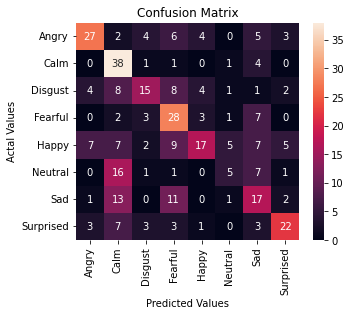

In [34]:
cm = confusion_matrix(expected_y,actual_y)
cm_df = pd.DataFrame(cm,index = ['Angry','Calm','Disgust','Fearful','Happy','Neutral','Sad','Surprised'], columns = ['Angry','Calm','Disgust','Fearful','Happy','Neutral','Sad','Surprised'])
plt.figure(figsize=(5,4))
sn.heatmap(cm_df,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Decision Tree Classifier 

In [35]:
dtree_model = DecisionTreeClassifier(max_depth = 6).fit(x_train, y_train) 
dtree_predictions = dtree_model.predict(x_test) 
print(accuracy_score(y_true=y_test,y_pred=dtree_predictions))
print(classification_report(y_test,dtree_predictions)) 
print(confusion_matrix(y_test, dtree_predictions) )

0.35555555555555557
              precision    recall  f1-score   support

       angry       0.87      0.39      0.54        51
        calm       0.40      0.84      0.54        45
     disgust       0.22      0.19      0.20        43
     fearful       0.52      0.39      0.44        44
       happy       0.42      0.22      0.29        59
     neutral       0.14      0.03      0.05        31
         sad       0.37      0.29      0.33        45
   surprised       0.18      0.43      0.26        42

    accuracy                           0.36       360
   macro avg       0.39      0.35      0.33       360
weighted avg       0.41      0.36      0.34       360

[[20  1  6  1  3  0  0 20]
 [ 0 38  0  0  0  1  5  1]
 [ 0  7  8  1  6  2  2 17]
 [ 1  5  4 17  3  0  3 11]
 [ 1  6  6  8 13  0  3 22]
 [ 0 20  3  0  2  1  1  4]
 [ 0 15  3  5  1  2 13  6]
 [ 1  4  6  1  3  1  8 18]]


# Support Vector Classifier

In [36]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train) 
svm_predictions = svm_model_linear.predict(x_test) 
print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 
print(confusion_matrix(y_test, svm_predictions) )

0.4583333333333333
              precision    recall  f1-score   support

       angry       0.53      0.53      0.53        51
        calm       0.45      0.69      0.54        45
     disgust       0.43      0.42      0.42        43
     fearful       0.40      0.45      0.43        44
       happy       0.50      0.39      0.44        59
     neutral       0.56      0.32      0.41        31
         sad       0.43      0.36      0.39        45
   surprised       0.43      0.48      0.45        42

    accuracy                           0.46       360
   macro avg       0.47      0.45      0.45       360
weighted avg       0.46      0.46      0.45       360

[[27  1  6  5  4  1  1  6]
 [ 0 31  4  1  0  2  6  1]
 [ 6  5 18  3  6  1  1  3]
 [ 6  1  4 20  4  0  2  7]
 [ 9  3  4  9 23  1  3  7]
 [ 0 11  1  0  1 10  7  1]
 [ 1 12  1  7  4  2 16  2]
 [ 2  5  4  5  4  1  1 20]]


# Random Forest Classifier 

In [37]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0) 
classifier.fit(x_train, y_train)   
c_p = classifier.predict(x_test) 
print(accuracy_score(y_true=y_test,y_pred=c_p))
print(classification_report(y_test,c_p)) 
print(confusion_matrix(y_test,c_p) )

0.5027777777777778
              precision    recall  f1-score   support

       angry       0.74      0.55      0.63        51
        calm       0.48      0.91      0.63        45
     disgust       0.37      0.49      0.42        43
     fearful       0.59      0.50      0.54        44
       happy       0.62      0.39      0.48        59
     neutral       0.47      0.23      0.30        31
         sad       0.55      0.36      0.43        45
   surprised       0.38      0.55      0.45        42

    accuracy                           0.50       360
   macro avg       0.52      0.50      0.49       360
weighted avg       0.54      0.50      0.49       360

[[28  0  7  1  2  0  1 12]
 [ 0 41  2  0  0  1  1  0]
 [ 5  7 21  0  6  0  1  3]
 [ 3  1  7 22  1  1  3  6]
 [ 1  3  9  8 23  1  2 12]
 [ 0 17  2  0  0  7  4  1]
 [ 0 16  2  5  1  1 16  4]
 [ 1  1  7  1  4  4  1 23]]
